## ViewCube survey analysis-Age
67 participants (May 2025).

In [1]:
import pandas as pd
import numpy as np
import math
import csv

%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from matplotlib.patches import Rectangle

In [2]:
import astropy
from astropy import stats

In [3]:
data = pd.read_csv("ViewCube_survey-clean.csv", delimiter=';')
data.fillna("x-x", inplace=True)
data

,Unnamed: 0,ID,Start time,Completion time,REF,Q1,Q2,Q3,Q4,Q5,...,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27
0,0,x-x,x-x,x-x,RES_ESP,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 2,Espectro 2,...,x-x,x-x,x-x,x-x,x-x,x-x,x-x,x-x,x-x,x-x
1,0,x-x,x-x,x-x,RES_ENG,Sonification 1,Left,Sonification 2,Sonification 2,Spectrum 2,...,x-x,x-x,x-x,x-x,x-x,x-x,x-x,x-x,x-x,x-x
2,1,1.0,4/18/24 10:01:49,4/18/24 10:26:12,anonymous,Sonificación 2,A la izquierda,Sonificación 2,Sonificación 2,Espectro 1,...,Mucha experiencia (profesional),Ninguna,Blues,31-40,No,España,Español,"Sí, utilicé auriculares.",Audio 3D / Gaming;,Gran trabajo!
3,2,2.0,4/18/24 14:48:33,4/18/24 15:19:46,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 4,Espectro 1,...,Algo de experiencia (hobby/entusiasta),Algo de experiencia (hobby/entusiasta),Rock,21-30,No,ESPAÑA,ESPAÑOL,"Sí, utilicé auriculares.",Intra-aurales;,x-x
4,3,3.0,4/18/24 17:14:38,4/18/24 17:21:38,anonymous,Sonificación 2,A la izquierda,Sonificación 2,Sonificación 1,Espectro 3,...,Algo de experiencia (hobby/entusiasta),Muy básica,Clasica,Prefiero no decirlo,No,España,Español,"No, no lo hice.",No lo sé.;,x-x
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,61,16.0,7/18/24 16:24:37,7/18/24 16:39:13,anonymous,Sonification 1,Left,Sonification 3,Sonification 2,Spectrum 3,...,Very experienced (professional),Very experienced (professional),"Electronic Music, Jazz, Classical, Folk, Rock",41-50,No,Malta,English,"Yes, I used headphones",Stereo;,x-x
63,62,17.0,7/21/24 9:56:47,7/21/24 10:55:44,anonymous,Sonification 2,Left,Sonification 3,Sonification 2,Spectrum 2,...,Some experienced (hobby/enthusiast),Experienced (amateur),"Classical, jazz, rock",21-30,No,China,Mandarin,"Yes, I used headphones",Stereo;,x-x
64,63,18.0,7/25/24 1:49:37,7/25/24 3:03:34,anonymous,Sonification 1,Left,Sonification 2,Sonification 2,Spectrum 2,...,No experienced,Very experienced (professional),"spatial electroacoustic music, music concrete,...",Prefer not to say,No,Australia,Elnglish,"Yes, I used headphones",Circum-aural;,discriminating between constant tone and rever...
65,64,19.0,7/29/24 10:32:28,7/29/24 10:50:09,anonymous,Sonification 2,Left,Sonification 2,Sonification 3,Spectrum 2,...,No experienced,Some experienced (hobby/enthusiast),Pop music,21-30,No,Spain,Catalan,"Yes, I used headphones",Stereo;,x-x


In [4]:
data_total_responses = len(data)-2
print("Total responses:", data_total_responses)

Total responses: 65


In [5]:
def percentage (participants):
    y = (participants/data_total_responses)*100
    return(y)

In [6]:
def percentage_sub (participants, subgroup_responses):
    z = (participants/subgroup_responses)*100
    return(z)

# Global results

### 12 Simple questions

In [7]:
Q1G = len([i for i in range(len(data)) if ((data.Q1[i] == data.Q1[0]) or (data.Q1[i] == data.Q1[1]))])-2
Q2G = len([i for i in range(len(data)) if ((data.Q2[i] == data.Q2[0]) or (data.Q2[i] == data.Q2[1]))])-2
Q3G = len([i for i in range(len(data)) if ((data.Q3[i] == data.Q3[0]) or (data.Q3[i] == data.Q3[1]))])-2
Q4G = len([i for i in range(len(data)) if ((data.Q4[i] == data.Q4[0]) or (data.Q4[i] == data.Q4[1]))])-2
Q5G = len([i for i in range(len(data)) if ((data.Q5[i] == data.Q5[0]) or (data.Q5[i] == data.Q5[1]))])-2
Q6G = len([i for i in range(len(data)) if ((data.Q6[i] == data.Q6[0]) or (data.Q6[i] == data.Q6[1]))])-2
Q7G = len([i for i in range(len(data)) if ((data.Q7[i] == data.Q7[0]) or (data.Q7[i] == data.Q7[1]))])-2
Q8G = len([i for i in range(len(data)) if ((data.Q8[i] == data.Q8[0]) or (data.Q8[i] == data.Q8[1]))])-2
Q9G = len([i for i in range(len(data)) if ((data.Q9[i] == data.Q9[0]) or (data.Q9[i] == data.Q9[1]))])-2
Q10G = len([i for i in range(len(data)) if ((data.Q10[i] == data.Q10[0]) or (data.Q10[i] == data.Q10[1]))])-2
Q11G = len([i for i in range(len(data)) if ((data.Q11[i] == data.Q11[0]) or (data.Q11[i] == data.Q11[1]))])-2
Q12G = len([i for i in range(len(data)) if ((data.Q12[i] == data.Q12[0]) or (data.Q12[i] == data.Q12[1]))])-2

data_correct = [Q1G,Q2G,Q3G,Q4G,Q5G,Q6G,Q7G,Q8G,Q9G,Q10G,Q11G,Q12G]
data_correct = np.array(data_correct, int)
data_correct #12 Single response correct results

array([30, 57, 25, 25, 39, 42, 34, 43, 31, 16, 26, 34])

In [8]:
mean_data_correct = np.mean(data_correct)
print("Total responses: ", data_total_responses)
print("Global success mean:", mean_data_correct/data_total_responses)

success_data_correct = np.sum(data_correct)
attempts_data_correct = 12* data_total_responses
conf_data_correct = astropy.stats.binom_conf_interval(success_data_correct, attempts_data_correct, confidence_level=0.68269, interval='jeffreys')
print("Jeffreys confidence interval: ", conf_data_correct) # Correct answers interval

Total responses:  65
Global success mean: 0.5153846153846153
Jeffreys confidence interval:  [0.49748195 0.53324786]


In [9]:
glob = pd.Series(data_correct/data_total_responses)

In [10]:
glob.describe()

count    12.000000
mean      0.515385
std       0.165372
min       0.246154
25%       0.396154
50%       0.500000
75%       0.611538
max       0.876923
dtype: float64

### 2 Combined questions

In [11]:
check_1 = "Lejos"
check_2 = "derecha"
check_3 = "formación"
check_4 = "Far"
check_5 = "Right"
check_6 = "forming"

Q13G = len([i for i in range(len(data)) if ((check_1 in data.Q13[i]) and (check_2 in data.Q13[i]) and (check_3 in data.Q13[i])) or ((check_4 in data.Q13[i]) and (check_5 in data.Q13[i]) and (check_6 in data.Q13[i]))])-2

check_7 = "Cerca"
check_8 = "izquierda"
check_9 = "vieja"
check_10 = "Close"
check_11 = "Left"
check_12 = "Retired"

Q14G = len([i for i in range(len(data)) if ((check_7 in data.Q14[i]) and (check_8 in data.Q14[i]) and (check_9 in data.Q14[i])) or ((check_10 in data.Q14[i]) and (check_11 in data.Q14[i]) and (check_12 in data.Q14[i]))])-2

combined_correct = [Q13G,Q14G]
combined_correct = np.array(combined_correct, int)

combined_correct

array([11, 10])

In [12]:
mean_combined_correct = np.mean(combined_correct)
print("Global success mean (Combined questions):", mean_combined_correct/data_total_responses)
success_combined_correct = np.sum(combined_correct)
attempts_combined_correct = 2* data_total_responses
conf_combined_correct = astropy.stats.binom_conf_interval(success_combined_correct, attempts_combined_correct, confidence_level=0.68269, interval='jeffreys')
print("Jeffreys confidence interval: ", conf_combined_correct) # Correct answers interval

Global success mean (Combined questions): 0.16153846153846155
Jeffreys confidence interval:  [0.13190661 0.19635536]


In [13]:
glob_comb = pd.Series(combined_correct/data_total_responses)
glob_comb.describe()

count    2.000000
mean     0.161538
std      0.010879
min      0.153846
25%      0.157692
50%      0.161538
75%      0.165385
max      0.169231
dtype: float64

## Qualitative questions

In [14]:
# Interactivity
Q15G_good = len([i for i in range(len(data)) if (("Buena" in data.Q15[i]) or ("Muy buena" in data.Q15[i]) or ("Good" in data.Q15[i]) or ("Very good" in data.Q15[i]))])
Q15G_acc = len([i for i in range(len(data)) if (("Aceptable" in data.Q15[i]) or ("Acceptable" in data.Q15[i]))])
Q15G_bad = len([i for i in range(len(data)) if (("Mala" in data.Q15[i]) or ("Muy mala" in data.Q15[i]) or ("Bad" in data.Q15[i]) or ("Very bad" in data.Q15[i]))])
Q15G_xxx = len([i for i in range(len(data)) if ("XXX" in data.Q15[i])])
print("Interactivity 'good' or 'very good':", Q15G_good) #Lack of this question in the first version of the survey (1 participant)
print("(%)", percentage_sub(Q15G_good, data_total_responses - Q15G_xxx))
print("Interactivity 'acceptable':", Q15G_acc)
print("(%)", percentage_sub(Q15G_acc, data_total_responses - Q15G_xxx))
print("Interactivity 'bad' or 'very bad':", Q15G_bad)
print("(%)", percentage_sub(Q15G_bad, data_total_responses - Q15G_xxx))
print("Participants that couldn't test the application in person:", Q15G_xxx)
print("(%)", percentage(Q15G_xxx))

Interactivity 'good' or 'very good': 34
(%) 80.95238095238095
Interactivity 'acceptable': 6
(%) 14.285714285714285
Interactivity 'bad' or 'very bad': 2
(%) 4.761904761904762
Participants that couldn't test the application in person: 23
(%) 35.38461538461539


In [15]:
# Usefulness
Q16G_good = len([i for i in range(len(data)) if (("Útil" in data.Q16[i]) or ("Muy útil" in data.Q16[i]) or ("Useful" in data.Q16[i]) or ("Very useful" in data.Q16[i]))])
Q16G_bad = len([i for i in range(len(data)) if (("dudosa" in data.Q16[i]) or ("Doubtedly" in data.Q16[i]) or ("Doubtely" in data.Q16[i]) or ("Inútil" in data.Q16[i]) or ("Useless" in data.Q16[i]))])
print("Participants finding it 'useful' or 'very useful':", Q16G_good)
print("(%)", percentage(Q16G_good))
print("Participants finding it 'Doubtedly useful' or 'useless':", Q16G_bad)
print("(%)", percentage(Q16G_bad))

Participants finding it 'useful' or 'very useful': 51
(%) 78.46153846153847
Participants finding it 'Doubtedly useful' or 'useless': 14
(%) 21.53846153846154


In [16]:
# Quality of sound
Q17G_good = len([i for i in range(len(data)) if (("Buen" in data.Q17[i]) or ("Muy buen" in data.Q17[i]) or ("Good" in data.Q17[i]) or ("Nice" in data.Q17[i]))])
Q17G_acc = len([i for i in range(len(data)) if (("Aceptable" in data.Q17[i]) or ("Acceptable" in data.Q17[i]))])
Q17G_bad = len([i for i in range(len(data)) if (("Mal" in data.Q17[i]) or ("Insoportable" in data.Q17[i]) or ("Bad" in data.Q17[i]) or ("Intolerable" in data.Q17[i]))])
print("Sound Quality 'good' or 'very good':", Q17G_good)
print("(%)", percentage(Q17G_good))
print("Sound Quality 'acceptable':", Q17G_acc)
print("(%)", percentage(Q17G_acc))
print("Sound Quality 'bad' or 'very bad':", Q17G_bad)
print("(%)", percentage(Q17G_bad))

Sound Quality 'good' or 'very good': 37
(%) 56.92307692307692
Sound Quality 'acceptable': 23
(%) 35.38461538461539
Sound Quality 'bad' or 'very bad': 5
(%) 7.6923076923076925


## Demographics

In [17]:
Astro = len([i for i in range(2,len(data)) if ((("profesional" in data.Q18[i]) or ("professional" in data.Q18[i])))])
Astro_mus_pro = len([i for i in range(2,len(data)) if ((("profesional" in data.Q18[i]) or ("professional" in data.Q18[i])) and (("profesional" in data.Q19[i]) or ("professional" in data.Q19[i])))])
Astro_mus_amt = len([i for i in range(2,len(data)) if ((("profesional" in data.Q18[i]) or ("professional" in data.Q18[i])) and (("experiencia" in data.Q19[i]) or ("experienced" in data.Q19[i])))])
Astro_pro = len([i for i in range(2,len(data)) if ((("profesional" in data.Q18[i]) or ("professional" in data.Q18[i]))) and not ((("profesional" in data.Q19[i]) or ("professional" in data.Q19[i]) or ("experiencia" in data.Q19[i]) or ("experienced" in data.Q19[i])))])
Astro_amt = len([i for i in range(2,len(data)) if ((("entusiasta" in data.Q18[i]) or ("enthusiast" in data.Q18[i]))) and not ((("profesional" in data.Q19[i]) or ("professional" in data.Q19[i]) or ("experiencia" in data.Q19[i]) or ("experienced" in data.Q19[i])))])
Mus_pro = len([i for i in range(2,len(data)) if ((("profesional" in data.Q19[i]) or ("professional" in data.Q19[i]))) and not ((("profesional" in data.Q18[i]) or ("professional" in data.Q18[i]) or ("entusiasta" in data.Q18[i]) or ("enthusiast" in data.Q18[i])))])
Mus_amt = len([i for i in range(2,len(data)) if ("amateur" in data.Q19[i]) and not (("profesional" in data.Q18[i]) or ("professional" in data.Q18[i]) or ("entusiasta" in data.Q18[i]) or ("enthusiast" in data.Q18[i]))])
Non_exp = data_total_responses - Astro_mus_pro - Astro_mus_amt - Astro_pro - Astro_amt - Mus_pro - Mus_amt
BLV = len([i for i in range(2,len(data)) if ("Yes" in data.Q22[i])]) #included within the professional astronomers group
check = Non_exp + Astro_mus_pro + Astro_mus_amt + Astro_pro + Astro_amt + Mus_pro + Mus_amt 
Astro = len([i for i in range(2,len(data)) if ((("profesional" in data.Q18[i]) or ("professional" in data.Q18[i])))])
Non_astro = len([i for i in range(2,len(data)) if not ((("profesional" in data.Q18[i]) or ("professional" in data.Q18[i])))])

print("Total number of participants (check):", check)

print("Number of professional astronomers:", Astro)
print("(%)", percentage(Astro))
print("Number of non professional astronomers:", Non_astro)
print("(%)", percentage(Non_astro))


print("------------------SUBGROUPS----------------------")
print("Number of professional astronomers-musicians:", Astro_mus_pro)
print("(%)", percentage(Astro_mus_pro))
print("Number of professional astronomers-amateur musicians:", Astro_mus_amt)
print("(%)", percentage(Astro_mus_amt))
print("Number of professional astronomers:", Astro_pro)
print("(%)", percentage(Astro_pro))
print("Number of amateur astronomers:", Astro_amt)
print("(%)", percentage(Astro_amt))
print("Number of professional musicians non-astronomers(professional and amateur):", Mus_pro)
print("(%)", percentage(Mus_pro))
print("Number of amateur musicians non-astronomers(professional and amateur):", Mus_amt)
print("(%)", percentage(Mus_amt))
print("Number of non-experienced:", Non_exp)
print("(%)", percentage(Non_exp))
print("Number of BLV participants:", BLV)
print("(%)", percentage(BLV))

Total number of participants (check): 65
Number of professional astronomers: 29
(%) 44.61538461538462
Number of non professional astronomers: 36
(%) 55.38461538461539
------------------SUBGROUPS----------------------
Number of professional astronomers-musicians: 1
(%) 1.5384615384615385
Number of professional astronomers-amateur musicians: 15
(%) 23.076923076923077
Number of professional astronomers: 14
(%) 21.53846153846154
Number of amateur astronomers: 5
(%) 7.6923076923076925
Number of professional musicians non-astronomers(professional and amateur): 4
(%) 6.153846153846154
Number of amateur musicians non-astronomers(professional and amateur): 4
(%) 6.153846153846154
Number of non-experienced: 22
(%) 33.84615384615385
Number of BLV participants: 0
(%) 0.0


In [18]:
#Participants' age range
Q21G_21 = len([i for i in range(len(data)) if (("Menos" in data.Q21[i]) or ("Under" in data.Q21[i]))])
Q21G_21_30 = len([i for i in range(len(data)) if (("21-30" in data.Q21[i]))])
Q21G_31_40 = len([i for i in range(len(data)) if (("31-40" in data.Q21[i]))])
Q21G_41_50 = len([i for i in range(len(data)) if (("41-50" in data.Q21[i]))])
Q21G_51_60 = len([i for i in range(len(data)) if (("51-60" in data.Q21[i]))])
Q21G_60 = len([i for i in range(len(data)) if (("Más" in data.Q21[i]) or ("Over" in data.Q21[i]))])

print("Number of participants under 21:", Q21G_21)
print("(%)", percentage(Q21G_21))
print("Number of participants between 21 and 30 :", Q21G_21_30)
print("(%)", percentage(Q21G_21_30))
print("Number of participants between 31 and 40 :", Q21G_31_40)
print("(%)", percentage(Q21G_31_40))
print("Number of participants between 41 and 50 :", Q21G_41_50)
print("(%)", percentage(Q21G_41_50))
print("Number of participants between 51 and 60 :", Q21G_51_60)
print("(%)", percentage(Q21G_51_60))
print("Number of participants over 60 :", Q21G_60)
print("(%)", percentage(Q21G_60))

Number of participants under 21: 1
(%) 1.5384615384615385
Number of participants between 21 and 30 : 18
(%) 27.692307692307693
Number of participants between 31 and 40 : 9
(%) 13.846153846153847
Number of participants between 41 and 50 : 19
(%) 29.230769230769234
Number of participants between 51 and 60 : 6
(%) 9.230769230769232
Number of participants over 60 : 10
(%) 15.384615384615385


## Appending Global results

In [19]:
column_list = ["Global", "<21", "21-30", "31-40", "41-50", "51-60", ">60"]
participants_list = []
success_list = []
Jeff_low_list = []
Jeff_high_list = []
std_list = []
comb_success_list = []
comb_Jeff_low_list = []
comb_Jeff_high_list = []
comb_std_list = []
interactivity_list = []
useful_list = []
sound_list = []

In [20]:
participants_list.append(data_total_responses)
success_list.append(glob.describe()["mean"])
Jeff_low_list.append(conf_data_correct[0])
Jeff_high_list.append(conf_data_correct[1])
std_list.append(glob.describe()["std"])
comb_success_list.append(glob_comb.describe()["mean"])
comb_Jeff_low_list.append(conf_combined_correct[0])
comb_Jeff_high_list.append(conf_combined_correct[1])
comb_std_list.append(glob_comb.describe()["std"])
interactivity_list.append(percentage_sub(Q15G_good, data_total_responses - Q15G_xxx))
useful_list.append(percentage(Q16G_good))
sound_list.append(percentage(Q17G_good))

# Analysis by age groups

### G<21

In [21]:
G21_list = []
G21_index = []
G21_counter = 0
for i in range(len(data)):
    if (("Menos" in data.Q21[i]) or ("Under" in data.Q21[i])):
        G21_counter += 1
        current_row = data.iloc[i]
        G21_list.append(current_row)
        G21_index.append(i)
        
print("Number of participants in G21:", G21_counter)
G21_df = pd.DataFrame(G21_list)
G21_df

Number of participants in G21: 1


,Unnamed: 0,ID,Start time,Completion time,REF,Q1,Q2,Q3,Q4,Q5,...,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27
11,10,10.0,4/18/24 23:21:02,4/18/24 23:30:11,anonymous,Sonificación 2,A la izquierda,Sonificación 4,Sonificación 1,Espectro 1,...,Ninguna,Ninguna,pop,Menos de 21,No,España,español,"No, no lo hice.",Estéreo;,x-x


In [22]:
Q1_21 = len([i for i in range(len(G21_df)) if ((G21_df.Q1[G21_index[i]] == data.Q1[0]) or (G21_df.Q1[G21_index[i]] == data.Q1[1]))])
Q2_21 = len([i for i in range(len(G21_df)) if ((G21_df.Q2[G21_index[i]] == data.Q2[0]) or (G21_df.Q2[G21_index[i]] == data.Q2[1]))])
Q3_21 = len([i for i in range(len(G21_df)) if ((G21_df.Q3[G21_index[i]] == data.Q3[0]) or (G21_df.Q3[G21_index[i]] == data.Q3[1]))])
Q4_21 = len([i for i in range(len(G21_df)) if ((G21_df.Q4[G21_index[i]] == data.Q4[0]) or (G21_df.Q4[G21_index[i]] == data.Q4[1]))])
Q5_21 = len([i for i in range(len(G21_df)) if ((G21_df.Q5[G21_index[i]] == data.Q5[0]) or (G21_df.Q5[G21_index[i]] == data.Q5[1]))])
Q6_21 = len([i for i in range(len(G21_df)) if ((G21_df.Q6[G21_index[i]] == data.Q6[0]) or (G21_df.Q6[G21_index[i]] == data.Q6[1]))])
Q7_21 = len([i for i in range(len(G21_df)) if ((G21_df.Q7[G21_index[i]] == data.Q7[0]) or (G21_df.Q7[G21_index[i]] == data.Q7[1]))])
Q8_21 = len([i for i in range(len(G21_df)) if ((G21_df.Q8[G21_index[i]] == data.Q8[0]) or (G21_df.Q8[G21_index[i]] == data.Q8[1]))])
Q9_21 = len([i for i in range(len(G21_df)) if ((G21_df.Q9[G21_index[i]] == data.Q9[0]) or (G21_df.Q9[G21_index[i]] == data.Q9[1]))])
Q10_21 = len([i for i in range(len(G21_df)) if ((G21_df.Q10[G21_index[i]] == data.Q10[0]) or (G21_df.Q10[G21_index[i]] == data.Q10[1]))])
Q11_21 = len([i for i in range(len(G21_df)) if ((G21_df.Q11[G21_index[i]] == data.Q11[0]) or (G21_df.Q11[G21_index[i]] == data.Q11[1]))])
Q12_21 = len([i for i in range(len(G21_df)) if ((G21_df.Q12[G21_index[i]] == data.Q12[0]) or (G21_df.Q12[G21_index[i]] == data.Q12[1]))])

G21_correct = [Q1_21,Q2_21,Q3_21,Q4_21,Q5_21,Q6_21,Q7_21,Q8_21,Q9_21,Q10_21,Q11_21,Q12_21]
G21_correct = np.array(G21_correct, int)
G21_correct #12 Single response correct results

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0])

In [23]:
G21_total_responses = len(G21_df)
mean_G21_correct = np.mean(G21_correct)
print("Total responses: ", G21_total_responses)
print("G_21 success mean:", mean_G21_correct/G21_total_responses)

success_G21_correct = np.sum(G21_correct)
attempts_G21_correct = 12* G21_total_responses
conf_G21_correct = astropy.stats.binom_conf_interval(success_G21_correct, attempts_G21_correct, confidence_level=0.68269, interval='jeffreys')
print("Jeffreys confidence interval: ", conf_G21_correct) # Correct answers interval

Total responses:  1
G_21 success mean: 0.25
Jeffreys confidence interval:  [0.14870222 0.39096507]


In [24]:
G21 = pd.Series(G21_correct/G21_total_responses)
G21.describe()

count    12.000000
mean      0.250000
std       0.452267
min       0.000000
25%       0.000000
50%       0.000000
75%       0.250000
max       1.000000
dtype: float64

In [25]:
Q13_21 = len([i for i in range(len(G21_df)) if ((check_1 in G21_df.Q13[G21_index[i]]) and (check_2 in G21_df.Q13[G21_index[i]]) and (check_3 in G21_df.Q13[G21_index[i]])) or ((check_4 in G21_df.Q13[G21_index[i]]) and (check_5 in G21_df.Q13[G21_index[i]]) and (check_6 in G21_df.Q13[G21_index[i]]))])
Q14_21 = len([i for i in range(len(G21_df)) if ((check_7 in G21_df.Q14[G21_index[i]]) and (check_8 in G21_df.Q14[G21_index[i]]) and (check_9 in G21_df.Q14[G21_index[i]])) or ((check_10 in G21_df.Q14[G21_index[i]]) and (check_11 in G21_df.Q14[G21_index[i]]) and (check_12 in G21_df.Q14[G21_index[i]]))])

G21_combined_correct = [Q13_21,Q14_21]
G21_combined_correct = np.array(G21_combined_correct, int)

G21_combined_correct

array([0, 0])

In [26]:
mean_G21_combined_correct = np.mean(G21_combined_correct)
print("G_21 success mean (Combined questions):", mean_G21_combined_correct/G21_total_responses)
success_G21_combined_correct = np.sum(G21_combined_correct)
attempts_G21_combined_correct = 2* G21_total_responses
conf_G21_combined_correct = astropy.stats.binom_conf_interval(success_G21_combined_correct, attempts_G21_combined_correct, confidence_level=0.68269, interval='jeffreys')
print("Jeffreys confidence interval: ", conf_G21_combined_correct) # Correct answers interval

G_21 success mean (Combined questions): 0.0
Jeffreys confidence interval:  [0.         0.35415837]


In [27]:
G21_combined = pd.Series(G21_combined_correct/G21_total_responses)
G21_combined.describe()

count    2.0
mean     0.0
std      0.0
min      0.0
25%      0.0
50%      0.0
75%      0.0
max      0.0
dtype: float64

In [28]:
# Interactivity
Q15_21_good = len([i for i in range(len(G21_df)) if (("Buena" in G21_df.Q15[G21_index[i]]) or ("Muy buena" in G21_df.Q15[G21_index[i]]) or ("Good" in G21_df.Q15[G21_index[i]]) or ("Very good" in G21_df.Q15[G21_index[i]]))])
Q15_21_acc = len([i for i in range(len(G21_df)) if (("Aceptable" in G21_df.Q15[G21_index[i]]) or ("Acceptable" in G21_df.Q15[G21_index[i]]))])
Q15_21_bad = len([i for i in range(len(G21_df)) if (("Mala" in G21_df.Q15[G21_index[i]]) or ("Muy mala" in G21_df.Q15[G21_index[i]]) or ("Bad" in G21_df.Q15[G21_index[i]]) or ("Very bad" in G21_df.Q15[G21_index[i]]))])
Q15_21_xxx = len([i for i in range(len(G21_df)) if (("XXX" in G21_df.Q15[G21_index[i]]))])
print("Interactivity 'good' or 'very good':", Q15_21_good) #Lack of this question in the first version of the survey (1 participant)
print("(%)", percentage_sub(Q15_21_good, G21_counter))
print("Interactivity 'acceptable':", Q15_21_acc)
print("(%)", percentage_sub(Q15_21_acc, G21_counter))
print("Interactivity 'bad' or 'very bad':", Q15_21_bad)
print("(%)", percentage_sub(Q15_21_bad, G21_counter))
print("Participants that couldn't test the application in person:", Q15_21_xxx)
print("(%)", percentage_sub(Q15_21_xxx, G21_counter))

Interactivity 'good' or 'very good': 0
(%) 0.0
Interactivity 'acceptable': 0
(%) 0.0
Interactivity 'bad' or 'very bad': 0
(%) 0.0
Participants that couldn't test the application in person: 1
(%) 100.0


In [29]:
# Usefulness
Q16_21_good = len([i for i in range(len(G21_df)) if (("Útil" in G21_df.Q16[G21_index[i]]) or ("Muy útil" in G21_df.Q16[G21_index[i]]) or ("Useful" in G21_df.Q16[G21_index[i]]) or ("Very useful" in G21_df.Q16[G21_index[i]]))])
Q16_21_bad = len([i for i in range(len(G21_df)) if (("dudosa" in G21_df.Q16[G21_index[i]]) or ("Doubtedly" in G21_df.Q16[G21_index[i]]) or ("Doubtely" in G21_df.Q16[G21_index[i]]) or ("Inútil" in G21_df.Q16[G21_index[i]]) or ("Useless" in G21_df.Q16[G21_index[i]]))])
print("Participants finding it 'useful' or 'very useful':", Q16_21_good)
print("(%)", percentage_sub(Q16_21_good, G21_counter))
print("Participants finding it 'Doubtedly useful' or 'useless':", Q16_21_bad)
print("(%)", percentage_sub(Q16_21_bad, G21_counter))

Participants finding it 'useful' or 'very useful': 1
(%) 100.0
Participants finding it 'Doubtedly useful' or 'useless': 0
(%) 0.0


In [30]:
# Quality of sound
Q17_21_good = len([i for i in range(len(G21_df)) if (("Buen" in G21_df.Q17[G21_index[i]]) or ("Muy buen" in G21_df.Q17[G21_index[i]]) or ("Good" in G21_df.Q17[G21_index[i]]) or ("Nice" in G21_df.Q17[G21_index[i]]))])
Q17_21_acc = len([i for i in range(len(G21_df)) if (("Aceptable" in G21_df.Q17[G21_index[i]]) or ("Acceptable" in G21_df.Q17[G21_index[i]]))])
Q17_21_bad = len([i for i in range(len(G21_df)) if (("Mal" in G21_df.Q17[G21_index[i]]) or ("Insoportable" in G21_df.Q17[G21_index[i]]) or ("Bad" in G21_df.Q17[G21_index[i]]) or ("Intolerable" in G21_df.Q17[G21_index[i]]))])
print("Sound Quality 'good' or 'very good':", Q17_21_good)
print("(%)", percentage_sub(Q17_21_good, G21_counter))
print("Sound Quality 'acceptable':", Q17_21_acc)
print("(%)", percentage(Q17_21_acc))
print("Sound Quality 'bad' or 'very bad':", Q17_21_bad)
print("(%)", percentage_sub(Q17_21_bad, G21_counter))

Sound Quality 'good' or 'very good': 1
(%) 100.0
Sound Quality 'acceptable': 0
(%) 0.0
Sound Quality 'bad' or 'very bad': 0
(%) 0.0


In [31]:
participants_list.append(G21_counter)
success_list.append(G21.describe()["mean"])
Jeff_low_list.append(conf_G21_correct[0])
Jeff_high_list.append(conf_G21_correct[1])
std_list.append(G21.describe()["std"])
comb_success_list.append(G21_combined.describe()["mean"])
comb_Jeff_low_list.append(conf_G21_combined_correct[0])
comb_Jeff_high_list.append(conf_G21_combined_correct[1])
comb_std_list.append(G21_combined.describe()["std"])
interactivity_list.append(percentage_sub(Q15_21_good, G21_counter))
useful_list.append(percentage_sub(Q16_21_good, G21_counter))
sound_list.append(percentage_sub(Q17_21_good, G21_counter))

### G21-30

In [32]:
G21_30_list = []
G21_30_index = []
G21_30_counter = 0
for i in range(len(data)):
    if ("21-30" in data.Q21[i]):
        G21_30_counter += 1
        current_row = data.iloc[i]
        G21_30_list.append(current_row)
        G21_30_index.append(i)
        
print("Number of participants in G21_30:", G21_30_counter)
G21_30_df = pd.DataFrame(G21_30_list)
G21_30_df

Number of participants in G21_30: 18


,Unnamed: 0,ID,Start time,Completion time,REF,Q1,Q2,Q3,Q4,Q5,...,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27
3,2,2.0,4/18/24 14:48:33,4/18/24 15:19:46,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 4,Espectro 1,...,Algo de experiencia (hobby/entusiasta),Algo de experiencia (hobby/entusiasta),Rock,21-30,No,ESPAÑA,ESPAÑOL,"Sí, utilicé auriculares.",Intra-aurales;,x-x
15,14,14.0,4/23/24 12:13:07,4/23/24 12:56:30,anonymous,Sonificación 1,A la izquierda,Sonificación 3,Sonificación 2,Espectro 3,...,Ninguna,Muy básica,Variada (un poco de todo),21-30,No,España,Castellano,"Sí, utilicé auriculares.",No lo sé.;,x-x
17,16,16.0,4/24/24 13:08:29,4/24/24 13:33:33,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 2,Espectro 2,...,Ninguna,Bastante experiencia (amateur),"Rock, Noise, Rock-Noise, Pop-Rock, Shoegaze, E...",21-30,No,España,Castellano,"Sí, utilicé auriculares.",Estéreo;No lo sé.;,x-x
20,19,19.0,4/25/24 11:19:03,4/25/24 11:32:28,anonymous,Sonificación 2,A la izquierda,Sonificación 3,Sonificación 2,Espectro 2,...,Mucha experiencia (profesional),Ninguna,Techno melódico,21-30,No,España,Español,"Sí, utilicé auriculares.",Estéreo;Circum-aurales;,Todo mi apoyo para este proyecto tan necesario!
21,20,20.0,4/25/24 11:30:57,4/25/24 11:46:09,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 2,Espectro 2,...,Mucha experiencia (profesional),Muy básica,"Pop, rock, música española/latina y francesa, ...",21-30,No,España,Francés,"Sí, utilicé auriculares.",Audio 3D / Gaming;,x-x
25,24,24.0,4/26/24 19:24:11,4/26/24 19:40:14,anonymous,Sonificación 2,A la izquierda,Sonificación 3,Sonificación 2,Espectro 2,...,Ninguna,Ninguna,Electrónica,21-30,No,España,Español,"Sí, utilicé auriculares.",Estéreo;,x-x
28,27,27.0,4/27/24 23:28:51,4/27/24 23:58:21,anonymous,Sonificación 2,A la izquierda,Sonificación 3,Sonificación 2,Espectro 2,...,Ninguna,Ninguna,"Jazz, Rock, Blues, Alternativo, Lofi, Metal.",21-30,No,México,Español,"Sí, utilicé auriculares.",Audio 3D / Gaming;,x-x
29,28,28.0,4/29/24 11:22:35,4/29/24 11:31:38,anonymous,Sonificación 2,A la izquierda,Sonificación 2,Sonificación 2,Espectro 2,...,Mucha experiencia (profesional),Algo de experiencia (hobby/entusiasta),"Música clásica, latino, pop-rock.",21-30,No,España,Español,"Sí, utilicé auriculares.",Intra-aurales;,x-x
41,40,40.0,6/24/24 18:07:27,6/24/24 18:18:36,anonymous,Sonificación 2,A la izquierda,Sonificación 2,Sonificación 1,Espectro 1,...,Mucha experiencia (profesional),Algo de experiencia (hobby/entusiasta),"Rock, Blues, Jazz",21-30,No,España,Español,"Sí, utilicé auriculares.",Intra-aurales;,x-x
44,43,3.0,4/25/24 11:55:21,4/25/24 12:18:21,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 2,Espectro 2,...,Mucha experiencia (profesional),Muy básica,"Rock suave, reggae, hip-hop, flamenco",21-30,No,España,"Euskara, Castellano","Sí, utilicé auriculares.",Audio 3D / Gaming;,Me hubiese ayudado una explicación más detalla...


In [33]:
Q1_21_30 = len([i for i in range(len(G21_30_df)) if ((G21_30_df.Q1[G21_30_index[i]] == data.Q1[0]) or (G21_30_df.Q1[G21_30_index[i]] == data.Q1[1]))])
Q2_21_30 = len([i for i in range(len(G21_30_df)) if ((G21_30_df.Q2[G21_30_index[i]] == data.Q2[0]) or (G21_30_df.Q2[G21_30_index[i]] == data.Q2[1]))])
Q3_21_30 = len([i for i in range(len(G21_30_df)) if ((G21_30_df.Q3[G21_30_index[i]] == data.Q3[0]) or (G21_30_df.Q3[G21_30_index[i]] == data.Q3[1]))])
Q4_21_30 = len([i for i in range(len(G21_30_df)) if ((G21_30_df.Q4[G21_30_index[i]] == data.Q4[0]) or (G21_30_df.Q4[G21_30_index[i]] == data.Q4[1]))])
Q5_21_30 = len([i for i in range(len(G21_30_df)) if ((G21_30_df.Q5[G21_30_index[i]] == data.Q5[0]) or (G21_30_df.Q5[G21_30_index[i]] == data.Q5[1]))])
Q6_21_30 = len([i for i in range(len(G21_30_df)) if ((G21_30_df.Q6[G21_30_index[i]] == data.Q6[0]) or (G21_30_df.Q6[G21_30_index[i]] == data.Q6[1]))])
Q7_21_30 = len([i for i in range(len(G21_30_df)) if ((G21_30_df.Q7[G21_30_index[i]] == data.Q7[0]) or (G21_30_df.Q7[G21_30_index[i]] == data.Q7[1]))])
Q8_21_30 = len([i for i in range(len(G21_30_df)) if ((G21_30_df.Q8[G21_30_index[i]] == data.Q8[0]) or (G21_30_df.Q8[G21_30_index[i]] == data.Q8[1]))])
Q9_21_30 = len([i for i in range(len(G21_30_df)) if ((G21_30_df.Q9[G21_30_index[i]] == data.Q9[0]) or (G21_30_df.Q9[G21_30_index[i]] == data.Q9[1]))])
Q10_21_30 = len([i for i in range(len(G21_30_df)) if ((G21_30_df.Q10[G21_30_index[i]] == data.Q10[0]) or (G21_30_df.Q10[G21_30_index[i]] == data.Q10[1]))])
Q11_21_30 = len([i for i in range(len(G21_30_df)) if ((G21_30_df.Q11[G21_30_index[i]] == data.Q11[0]) or (G21_30_df.Q11[G21_30_index[i]] == data.Q11[1]))])
Q12_21_30 = len([i for i in range(len(G21_30_df)) if ((G21_30_df.Q12[G21_30_index[i]] == data.Q12[0]) or (G21_30_df.Q12[G21_30_index[i]] == data.Q12[1]))])

G21_30_correct = [Q1_21_30,Q2_21_30,Q3_21_30,Q4_21_30,Q5_21_30,Q6_21_30,Q7_21_30,Q8_21_30,Q9_21_30,Q10_21_30,Q11_21_30,Q12_21_30]
G21_30_correct = np.array(G21_30_correct, int)
G21_30_correct #12 Single response correct results

array([ 8, 18,  6,  8, 13, 11, 10, 13, 10,  5,  8, 10])

In [34]:
G21_30_total_responses = len(G21_30_df)
mean_G21_30_correct = np.mean(G21_30_correct)
print("Total responses: ", G21_30_total_responses)
print("G_21_30 success mean:", mean_G21_30_correct/G21_30_total_responses)

success_G21_30_correct = np.sum(G21_30_correct)
attempts_G21_30_correct = 12* G21_30_total_responses
conf_G21_30_correct = astropy.stats.binom_conf_interval(success_G21_30_correct, attempts_G21_30_correct, confidence_level=0.68269, interval='jeffreys')
print("Jeffreys confidence interval: ", conf_G21_30_correct) # Correct answers interval

Total responses:  18
G_21_30 success mean: 0.5555555555555556
Jeffreys confidence interval:  [0.52156643 0.5890317 ]


In [35]:
G21_30 = pd.Series(G21_30_correct/G21_30_total_responses)
G21_30.describe()

count    12.000000
mean      0.555556
std       0.195344
min       0.277778
25%       0.444444
50%       0.555556
75%       0.638889
max       1.000000
dtype: float64

In [36]:
Q13_21_30 = len([i for i in range(len(G21_30_df)) if ((check_1 in G21_30_df.Q13[G21_30_index[i]]) and (check_2 in G21_30_df.Q13[G21_30_index[i]]) and (check_3 in G21_30_df.Q13[G21_30_index[i]])) or ((check_4 in G21_30_df.Q13[G21_30_index[i]]) and (check_5 in G21_30_df.Q13[G21_30_index[i]]) and (check_6 in G21_30_df.Q13[G21_30_index[i]]))])
Q14_21_30 = len([i for i in range(len(G21_30_df)) if ((check_7 in G21_30_df.Q14[G21_30_index[i]]) and (check_8 in G21_30_df.Q14[G21_30_index[i]]) and (check_9 in G21_30_df.Q14[G21_30_index[i]])) or ((check_10 in G21_30_df.Q14[G21_30_index[i]]) and (check_11 in G21_30_df.Q14[G21_30_index[i]]) and (check_12 in G21_30_df.Q14[G21_30_index[i]]))])

G21_30_combined_correct = [Q13_21_30,Q14_21_30]
G21_30_combined_correct = np.array(G21_30_combined_correct, int)

G21_30_combined_correct

array([2, 1])

In [37]:
mean_G21_30_combined_correct = np.mean(G21_30_combined_correct)
print("G_21_30 success mean (Combined questions):", mean_G21_30_combined_correct/G21_30_total_responses)
success_G21_30_combined_correct = np.sum(G21_30_combined_correct)
attempts_G21_30_combined_correct = 2* G21_30_total_responses
conf_G21_30_combined_correct = astropy.stats.binom_conf_interval(success_G21_30_combined_correct, attempts_G21_30_combined_correct, confidence_level=0.68269, interval='jeffreys')
print("Jeffreys confidence interval: ", conf_G21_30_combined_correct) # Correct answers interval

G_21_30 success mean (Combined questions): 0.08333333333333333
Jeffreys confidence interval:  [0.04834216 0.14115867]


In [38]:
G21_30_combined = pd.Series(G21_30_combined_correct/G21_30_total_responses)
G21_30_combined.describe()

count    2.000000
mean     0.083333
std      0.039284
min      0.055556
25%      0.069444
50%      0.083333
75%      0.097222
max      0.111111
dtype: float64

### Qualitative

In [39]:
# Interactivity
Q15_21_30_good = len([i for i in range(len(G21_30_df)) if (("Buena" in G21_30_df.Q15[G21_30_index[i]]) or ("Muy buena" in G21_30_df.Q15[G21_30_index[i]]) or ("Good" in G21_30_df.Q15[G21_30_index[i]]) or ("Very good" in G21_30_df.Q15[G21_30_index[i]]))])
Q15_21_30_acc = len([i for i in range(len(G21_30_df)) if (("Aceptable" in G21_30_df.Q15[G21_30_index[i]]) or ("Acceptable" in G21_30_df.Q15[G21_30_index[i]]))])
Q15_21_30_bad = len([i for i in range(len(G21_30_df)) if (("Mala" in G21_30_df.Q15[G21_30_index[i]]) or ("Muy mala" in G21_30_df.Q15[G21_30_index[i]]) or ("Bad" in G21_30_df.Q15[G21_30_index[i]]) or ("Very bad" in G21_30_df.Q15[G21_30_index[i]]))])
Q15_21_30_xxx = len([i for i in range(len(G21_30_df)) if (("XXX" in G21_30_df.Q15[G21_30_index[i]]))])
print("Interactivity 'good' or 'very good':", Q15_21_30_good) #Lack of this question in the first version of the survey (1 participant)
print("(%)", percentage_sub(Q15_21_30_good, G21_30_counter - Q15_21_30_xxx))
print("Interactivity 'acceptable':", Q15_21_30_acc)
print("(%)", percentage_sub(Q15_21_30_acc, G21_30_counter - Q15_21_30_xxx))
print("Interactivity 'bad' or 'very bad':", Q15_21_30_bad)
print("(%)", percentage_sub(Q15_21_30_bad, G21_30_counter - Q15_21_30_xxx))
print("Participants that couldn't test the application in person:", Q15_21_30_xxx)
print("(%)", percentage_sub(Q15_21_30_xxx, G21_30_counter))

Interactivity 'good' or 'very good': 7
(%) 77.77777777777779
Interactivity 'acceptable': 1
(%) 11.11111111111111
Interactivity 'bad' or 'very bad': 1
(%) 11.11111111111111
Participants that couldn't test the application in person: 9
(%) 50.0


In [40]:
# Usefulness
Q16_21_30_good = len([i for i in range(len(G21_30_df)) if (("Útil" in G21_30_df.Q16[G21_30_index[i]]) or ("Muy útil" in G21_30_df.Q16[G21_30_index[i]]) or ("Useful" in G21_30_df.Q16[G21_30_index[i]]) or ("Very useful" in G21_30_df.Q16[G21_30_index[i]]))])
Q16_21_30_bad = len([i for i in range(len(G21_30_df)) if (("dudosa" in G21_30_df.Q16[G21_30_index[i]]) or ("Doubtedly" in G21_30_df.Q16[G21_30_index[i]]) or ("Doubtely" in G21_30_df.Q16[G21_30_index[i]]) or ("Inútil" in G21_30_df.Q16[G21_30_index[i]]) or ("Useless" in G21_30_df.Q16[G21_30_index[i]]))])
print("Participants finding it 'useful' or 'very useful':", Q16_21_30_good)
print("(%)", percentage_sub(Q16_21_30_good, G21_30_counter))
print("Participants finding it 'Doubtedly useful' or 'useless':", Q16_21_30_bad)
print("(%)", percentage_sub(Q16_21_30_bad, G21_30_counter))

Participants finding it 'useful' or 'very useful': 14
(%) 77.77777777777779
Participants finding it 'Doubtedly useful' or 'useless': 4
(%) 22.22222222222222


In [41]:
# Quality of sound
Q17_21_30_good = len([i for i in range(len(G21_30_df)) if (("Buen" in G21_30_df.Q17[G21_30_index[i]]) or ("Muy buen" in G21_30_df.Q17[G21_30_index[i]]) or ("Good" in G21_30_df.Q17[G21_30_index[i]]) or ("Nice" in G21_30_df.Q17[G21_30_index[i]]))])
Q17_21_30_acc = len([i for i in range(len(G21_30_df)) if (("Aceptable" in G21_30_df.Q17[G21_30_index[i]]) or ("Acceptable" in G21_30_df.Q17[G21_30_index[i]]))])
Q17_21_30_bad = len([i for i in range(len(G21_30_df)) if (("Mal" in G21_30_df.Q17[G21_30_index[i]]) or ("Insoportable" in G21_30_df.Q17[G21_30_index[i]]) or ("Bad" in G21_30_df.Q17[G21_30_index[i]]) or ("Intolerable" in G21_30_df.Q17[G21_30_index[i]]))])
print("Sound Quality 'good' or 'very good':", Q17_21_30_good)
print("(%)", percentage_sub(Q17_21_30_good, G21_30_counter))
print("Sound Quality 'acceptable':", Q17_21_30_acc)
print("(%)", percentage(Q17_21_30_acc))
print("Sound Quality 'bad' or 'very bad':", Q17_21_30_bad)
print("(%)", percentage_sub(Q17_21_30_bad, G21_30_counter))

Sound Quality 'good' or 'very good': 10
(%) 55.55555555555556
Sound Quality 'acceptable': 8
(%) 12.307692307692308
Sound Quality 'bad' or 'very bad': 0
(%) 0.0


In [42]:
participants_list.append(G21_30_counter)
success_list.append(G21_30.describe()["mean"])
Jeff_low_list.append(conf_G21_30_correct[0])
Jeff_high_list.append(conf_G21_30_correct[1])
std_list.append(G21_30.describe()["std"])
comb_success_list.append(G21_30_combined.describe()["mean"])
comb_Jeff_low_list.append(conf_G21_30_combined_correct[0])
comb_Jeff_high_list.append(conf_G21_30_combined_correct[1])
comb_std_list.append(G21_30_combined.describe()["std"])
interactivity_list.append(percentage_sub(Q15_21_30_good, G21_30_counter - Q15_21_30_xxx))
useful_list.append(percentage_sub(Q16_21_30_good, G21_30_counter))
sound_list.append(percentage_sub(Q17_21_30_good, G21_30_counter))

### G31_40

In [43]:
G31_40_list = []
G31_40_index = []
G31_40_counter = 0
for i in range(len(data)):
    if ("31-40" in data.Q21[i]):
        G31_40_counter += 1
        current_row = data.iloc[i]
        G31_40_list.append(current_row)
        G31_40_index.append(i)
        
print("Number of participants in G31_40:", G31_40_counter)
G31_40_df = pd.DataFrame(G31_40_list)
G31_40_df

Number of participants in G31_40: 9


,Unnamed: 0,ID,Start time,Completion time,REF,Q1,Q2,Q3,Q4,Q5,...,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27
2,1,1.0,4/18/24 10:01:49,4/18/24 10:26:12,anonymous,Sonificación 2,A la izquierda,Sonificación 2,Sonificación 2,Espectro 1,...,Mucha experiencia (profesional),Ninguna,Blues,31-40,No,España,Español,"Sí, utilicé auriculares.",Audio 3D / Gaming;,Gran trabajo!
14,13,13.0,4/22/24 22:03:27,4/22/24 22:09:19,anonymous,Sonificación 2,A la derecha,Sonificación 1,Sonificación 3,Espectro 3,...,Ninguna,Algo de experiencia (hobby/entusiasta),el Fary,31-40,No,España,Castellano,"No, no lo hice.",Estéreo;,x-x
30,29,29.0,4/30/24 11:11:36,4/30/24 11:37:53,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 2,Espectro 2,...,Ninguna,Mucha experiencia (professional),"Rock psicodelico, Jazz, Reggae, Electronica",31-40,No,España,Castellano,"Sí, utilicé auriculares.",Estéreo;Intra-aurales;,x-x
31,30,30.0,5/2/24 14:19:24,5/2/24 14:47:41,anonymous,Sonificación 2,A la derecha,Sonificación 3,Sonificación 2,Espectro 2,...,Ninguna,Algo de experiencia (hobby/entusiasta),"R&B, jazz, indie, pop, electrónica",31-40,No,España,Español,"Sí, utilicé auriculares.",Estéreo;,Buen trabajo!
33,32,32.0,5/3/24 12:31:43,5/3/24 13:15:07,anonymous,Sonificación 2,A la izquierda,Sonificación 2,Sonificación 2,Espectro 2,...,Algo de experiencia (hobby/entusiasta),Algo de experiencia (hobby/entusiasta),Experimental,31-40,No,España,Castellano,"Sí, utilicé auriculares.",Estéreo;Circum-aurales;,x-x
48,47,2.0,4/17/24 11:32:00,4/17/24 12:09:06,anonymous,Sonification 1,Left,Sonification 2,Sonification 2,Spectrum 1,...,Very experienced (professional),Not experienced,"Rock, trash, grunge, metal",31-40,No,Spain,Spanish,"Yes, I used headphones",x-x,x-x
49,48,3.0,4/26/24 4:40:27,4/26/24 5:03:39,anonymous,Sonification 1,Right,Sonification 2,Sonification 1,Spectrum 2,...,Very experienced (professional),Experienced (amateur),"Rock, folk, jazz",31-40,No,Spain,Greek,"Yes, I used headphones",Intra-aural;,The localization was not very easy to distinct...
57,56,11.0,6/26/24 6:39:03,6/26/24 7:09:03,anonymous,Sonification 2,Left,Sonification 2,Sonification 2,Spectrum 2,...,Some experienced (hobby/enthusiast),Some experienced (hobby/enthusiast),Alternative rock & Japanese pop,31-40,No,Japan,Chinese,"Yes, I used headphones",I don't know;,I am not sure the use of this tool. It is not...
66,66,1.0,5/13/24 11:17:19,5/13/24 11:33:10,anonymous,Sonification 2,Left,Sonification 2,Sonification 2,Spectrum 2,...,Very experienced (professional),Experienced (amateur),Electronic,31-40,No,United Kingdom,English,"Yes, I used headphones",Stereo;,x-x


In [44]:
Q1_31_40 = len([i for i in range(len(G31_40_df)) if ((G31_40_df.Q1[G31_40_index[i]] == data.Q1[0]) or (G31_40_df.Q1[G31_40_index[i]] == data.Q1[1]))])
Q2_31_40 = len([i for i in range(len(G31_40_df)) if ((G31_40_df.Q2[G31_40_index[i]] == data.Q2[0]) or (G31_40_df.Q2[G31_40_index[i]] == data.Q2[1]))])
Q3_31_40 = len([i for i in range(len(G31_40_df)) if ((G31_40_df.Q3[G31_40_index[i]] == data.Q3[0]) or (G31_40_df.Q3[G31_40_index[i]] == data.Q3[1]))])
Q4_31_40 = len([i for i in range(len(G31_40_df)) if ((G31_40_df.Q4[G31_40_index[i]] == data.Q4[0]) or (G31_40_df.Q4[G31_40_index[i]] == data.Q4[1]))])
Q5_31_40 = len([i for i in range(len(G31_40_df)) if ((G31_40_df.Q5[G31_40_index[i]] == data.Q5[0]) or (G31_40_df.Q5[G31_40_index[i]] == data.Q5[1]))])
Q6_31_40 = len([i for i in range(len(G31_40_df)) if ((G31_40_df.Q6[G31_40_index[i]] == data.Q6[0]) or (G31_40_df.Q6[G31_40_index[i]] == data.Q6[1]))])
Q7_31_40 = len([i for i in range(len(G31_40_df)) if ((G31_40_df.Q7[G31_40_index[i]] == data.Q7[0]) or (G31_40_df.Q7[G31_40_index[i]] == data.Q7[1]))])
Q8_31_40 = len([i for i in range(len(G31_40_df)) if ((G31_40_df.Q8[G31_40_index[i]] == data.Q8[0]) or (G31_40_df.Q8[G31_40_index[i]] == data.Q8[1]))])
Q9_31_40 = len([i for i in range(len(G31_40_df)) if ((G31_40_df.Q9[G31_40_index[i]] == data.Q9[0]) or (G31_40_df.Q9[G31_40_index[i]] == data.Q9[1]))])
Q10_31_40 = len([i for i in range(len(G31_40_df)) if ((G31_40_df.Q10[G31_40_index[i]] == data.Q10[0]) or (G31_40_df.Q10[G31_40_index[i]] == data.Q10[1]))])
Q11_31_40 = len([i for i in range(len(G31_40_df)) if ((G31_40_df.Q11[G31_40_index[i]] == data.Q11[0]) or (G31_40_df.Q11[G31_40_index[i]] == data.Q11[1]))])
Q12_31_40 = len([i for i in range(len(G31_40_df)) if ((G31_40_df.Q12[G31_40_index[i]] == data.Q12[0]) or (G31_40_df.Q12[G31_40_index[i]] == data.Q12[1]))])

G31_40_correct = [Q1_31_40,Q2_31_40,Q3_31_40,Q4_31_40,Q5_31_40,Q6_31_40,Q7_31_40,Q8_31_40,Q9_31_40,Q10_31_40,Q11_31_40,Q12_31_40]
G31_40_correct = np.array(G31_40_correct, int)
G31_40_correct #12 Single response correct results

array([3, 6, 3, 4, 6, 7, 7, 8, 3, 3, 2, 3])

In [45]:
G31_40_total_responses = len(G31_40_df)
mean_G31_40_correct = np.mean(G31_40_correct)
print("Total responses: ", G31_40_total_responses)
print("G_21_30 success mean:", mean_G31_40_correct/G31_40_total_responses)

success_G31_40_correct = np.sum(G31_40_correct)
attempts_G31_40_correct = 12* G31_40_total_responses
conf_G31_40_correct = astropy.stats.binom_conf_interval(success_G31_40_correct, attempts_G31_40_correct, confidence_level=0.68269, interval='jeffreys')
print("Jeffreys confidence interval: ", conf_G31_40_correct) # Correct answers interval

Total responses:  9
G_21_30 success mean: 0.5092592592592592
Jeffreys confidence interval:  [0.4612913 0.5570567]


In [46]:
G31_40 = pd.Series(G31_40_correct/G31_40_total_responses)
G31_40.describe()

count    12.000000
mean      0.509259
std       0.229469
min       0.222222
25%       0.333333
50%       0.388889
75%       0.694444
max       0.888889
dtype: float64

In [47]:
Q13_31_40 = len([i for i in range(len(G31_40_df)) if ((check_1 in G31_40_df.Q13[G31_40_index[i]]) and (check_2 in G31_40_df.Q13[G31_40_index[i]]) and (check_3 in G31_40_df.Q13[G31_40_index[i]])) or ((check_4 in G31_40_df.Q13[G31_40_index[i]]) and (check_5 in G31_40_df.Q13[G31_40_index[i]]) and (check_6 in G31_40_df.Q13[G31_40_index[i]]))])
Q14_31_40 = len([i for i in range(len(G31_40_df)) if ((check_7 in G31_40_df.Q14[G31_40_index[i]]) and (check_8 in G31_40_df.Q14[G31_40_index[i]]) and (check_9 in G31_40_df.Q14[G31_40_index[i]])) or ((check_10 in G31_40_df.Q14[G31_40_index[i]]) and (check_11 in G31_40_df.Q14[G31_40_index[i]]) and (check_12 in G31_40_df.Q14[G31_40_index[i]]))])

G31_40_combined_correct = [Q13_31_40,Q14_31_40]
G31_40_combined_correct = np.array(G31_40_combined_correct, int)

G31_40_combined_correct

array([1, 2])

In [48]:
mean_G31_40_combined_correct = np.mean(G31_40_combined_correct)
print("G_31_40 success mean (Combined questions):", mean_G31_40_combined_correct/G31_40_total_responses)
success_G31_40_combined_correct = np.sum(G31_40_combined_correct)
attempts_G31_40_combined_correct = 2* G31_40_total_responses
conf_G31_40_combined_correct = astropy.stats.binom_conf_interval(success_G31_40_combined_correct, attempts_G31_40_combined_correct, confidence_level=0.68269, interval='jeffreys')
print("Jeffreys confidence interval: ", conf_G31_40_combined_correct) # Correct answers interval

G_31_40 success mean (Combined questions): 0.16666666666666666
Jeffreys confidence interval:  [0.09785526 0.27136606]


In [49]:
G31_40_combined = pd.Series(G31_40_combined_correct/G31_40_total_responses)
G31_40_combined.describe()

count    2.000000
mean     0.166667
std      0.078567
min      0.111111
25%      0.138889
50%      0.166667
75%      0.194444
max      0.222222
dtype: float64

In [50]:
# Interactivity
Q15_31_40_good = len([i for i in range(len(G31_40_df)) if (("Buena" in G31_40_df.Q15[G31_40_index[i]]) or ("Muy buena" in G31_40_df.Q15[G31_40_index[i]]) or ("Good" in G31_40_df.Q15[G31_40_index[i]]) or ("Very good" in G31_40_df.Q15[G31_40_index[i]]))])
Q15_31_40_acc = len([i for i in range(len(G31_40_df)) if (("Aceptable" in G31_40_df.Q15[G31_40_index[i]]) or ("Acceptable" in G31_40_df.Q15[G31_40_index[i]]))])
Q15_31_40_bad = len([i for i in range(len(G31_40_df)) if (("Mala" in G31_40_df.Q15[G31_40_index[i]]) or ("Muy mala" in G31_40_df.Q15[G31_40_index[i]]) or ("Bad" in G31_40_df.Q15[G31_40_index[i]]) or ("Very bad" in G31_40_df.Q15[G31_40_index[i]]))])
Q15_31_40_xxx = len([i for i in range(len(G31_40_df)) if (("XXX" in G31_40_df.Q15[G31_40_index[i]]))])
print("Interactivity 'good' or 'very good':", Q15_31_40_good) #Lack of this question in the first version of the survey (1 participant)
print("(%)", percentage_sub(Q15_31_40_good, G31_40_counter - Q15_31_40_xxx))
print("Interactivity 'acceptable':", Q15_31_40_acc)
print("(%)", percentage_sub(Q15_31_40_acc, G31_40_counter - Q15_31_40_xxx))
print("Interactivity 'bad' or 'very bad':", Q15_31_40_bad)
print("(%)", percentage_sub(Q15_31_40_bad, G31_40_counter - Q15_31_40_xxx))
print("Participants that couldn't test the application in person:", Q15_31_40_xxx)
print("(%)", percentage_sub(Q15_31_40_xxx, G31_40_counter))

Interactivity 'good' or 'very good': 4
(%) 80.0
Interactivity 'acceptable': 1
(%) 20.0
Interactivity 'bad' or 'very bad': 0
(%) 0.0
Participants that couldn't test the application in person: 4
(%) 44.44444444444444


In [51]:
# Usefulness
Q16_31_40_good = len([i for i in range(len(G31_40_df)) if (("Útil" in G31_40_df.Q16[G31_40_index[i]]) or ("Muy útil" in G31_40_df.Q16[G31_40_index[i]]) or ("Useful" in G31_40_df.Q16[G31_40_index[i]]) or ("Very useful" in G31_40_df.Q16[G31_40_index[i]]))])
Q16_31_40_bad = len([i for i in range(len(G31_40_df)) if (("dudosa" in G31_40_df.Q16[G31_40_index[i]]) or ("Doubtedly" in G31_40_df.Q16[G31_40_index[i]]) or ("Doubtely" in G31_40_df.Q16[G31_40_index[i]]) or ("Inútil" in G31_40_df.Q16[G31_40_index[i]]) or ("Useless" in G31_40_df.Q16[G31_40_index[i]]))])
print("Participants finding it 'useful' or 'very useful':", Q16_31_40_good)
print("(%)", percentage_sub(Q16_31_40_good, G31_40_counter))
print("Participants finding it 'Doubtedly useful' or 'useless':", Q16_31_40_bad)
print("(%)", percentage_sub(Q16_31_40_bad, G31_40_counter))

Participants finding it 'useful' or 'very useful': 7
(%) 77.77777777777779
Participants finding it 'Doubtedly useful' or 'useless': 2
(%) 22.22222222222222


In [52]:
# Quality of sound
Q17_31_40_good = len([i for i in range(len(G31_40_df)) if (("Buen" in G31_40_df.Q17[G31_40_index[i]]) or ("Muy buen" in G31_40_df.Q17[G31_40_index[i]]) or ("Good" in G31_40_df.Q17[G31_40_index[i]]) or ("Nice" in G31_40_df.Q17[G31_40_index[i]]))])
Q17_31_40_acc = len([i for i in range(len(G31_40_df)) if (("Aceptable" in G31_40_df.Q17[G31_40_index[i]]) or ("Acceptable" in G31_40_df.Q17[G31_40_index[i]]))])
Q17_31_40_bad = len([i for i in range(len(G31_40_df)) if (("Mal" in G31_40_df.Q17[G31_40_index[i]]) or ("Insoportable" in G31_40_df.Q17[G31_40_index[i]]) or ("Bad" in G31_40_df.Q17[G31_40_index[i]]) or ("Intolerable" in G31_40_df.Q17[G31_40_index[i]]))])
print("Sound Quality 'good' or 'very good':", Q17_31_40_good)
print("(%)", percentage_sub(Q17_31_40_good, G31_40_counter))
print("Sound Quality 'acceptable':", Q17_31_40_acc)
print("(%)", percentage(Q17_31_40_acc))
print("Sound Quality 'bad' or 'very bad':", Q17_31_40_bad)
print("(%)", percentage_sub(Q17_31_40_bad, G31_40_counter))

Sound Quality 'good' or 'very good': 4
(%) 44.44444444444444
Sound Quality 'acceptable': 3
(%) 4.615384615384616
Sound Quality 'bad' or 'very bad': 2
(%) 22.22222222222222


In [53]:
participants_list.append(G31_40_counter)
success_list.append(G31_40.describe()["mean"])
Jeff_low_list.append(conf_G31_40_correct[0])
Jeff_high_list.append(conf_G31_40_correct[1])
std_list.append(G31_40.describe()["std"])
comb_success_list.append(G31_40_combined.describe()["mean"])
comb_Jeff_low_list.append(conf_G31_40_combined_correct[0])
comb_Jeff_high_list.append(conf_G31_40_combined_correct[1])
comb_std_list.append(G31_40_combined.describe()["std"])
interactivity_list.append(percentage_sub(Q15_31_40_good, G31_40_counter - Q15_31_40_xxx))
useful_list.append(percentage_sub(Q16_31_40_good, G31_40_counter))
sound_list.append(percentage_sub(Q17_31_40_good, G31_40_counter))

### G41_50

In [54]:
G41_50_list = []
G41_50_index = []
G41_50_counter = 0
for i in range(len(data)):
    if ("41-50" in data.Q21[i]):
        G41_50_counter += 1
        current_row = data.iloc[i]
        G41_50_list.append(current_row)
        G41_50_index.append(i)
        
print("Number of participants in G41_50:", G41_50_counter)
G41_50_df = pd.DataFrame(G41_50_list)
G41_50_df

Number of participants in G41_50: 19


,Unnamed: 0,ID,Start time,Completion time,REF,Q1,Q2,Q3,Q4,Q5,...,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27
16,15,15.0,4/23/24 12:44:04,4/23/24 13:08:00,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 2,Espectro 1,...,Mucha experiencia (profesional),Bastante experiencia (amateur),"Clasica, Jazz, Cantautores",41-50,No,España,Italiano,"Sí, utilicé auriculares.",Estéreo;,x-x
18,17,17.0,4/24/24 20:09:26,4/24/24 20:17:02,anonymous,Sonificación 2,A la izquierda,Sonificación 3,Sonificación 3,Espectro 1,...,Ninguna,Muy básica,Todo tipo,41-50,No,España,Español,"Sí, utilicé auriculares.",Estéreo;Circum-aurales;,x-x
22,21,21.0,4/25/24 14:36:30,4/25/24 15:03:00,anonymous,Sonificación 2,A la izquierda,Sonificación 2,Sonificación 2,Espectro 2,...,Mucha experiencia (profesional),Algo de experiencia (hobby/entusiasta),"jazz, clásica",41-50,No,españa,español,"Sí, utilicé auriculares.",Circum-aurales;,x-x
27,26,26.0,4/26/24 19:53:36,4/27/24 0:52:27,anonymous,Sonificación 2,A la izquierda,Sonificación 2,Sonificación 2,Espectro 2,...,Ninguna,Muy básica,Jazz,41-50,No,España,Mallorquín,"Sí, utilicé auriculares.",Estéreo;,x-x
32,31,31.0,5/2/24 18:31:56,5/2/24 18:51:31,anonymous,Sonificación 1,A la izquierda,Sonificación 3,Sonificación 2,Espectro 2,...,Mucha experiencia (profesional),Bastante experiencia (amateur),Jazz,41-50,No,España,Español,"Sí, utilicé auriculares.",Estéreo;,La diferencia entre zona con formación estelar...
34,33,33.0,5/5/24 23:19:51,5/5/24 23:38:24,anonymous,Sonificación 2,A la izquierda,Sonificación 2,Sonificación 2,Espectro 2,...,Ninguna,Bastante experiencia (amateur),"Jazz, rock, clásica, blues",41-50,No,España,Español,"Sí, utilicé auriculares.",Circum-aurales;,La reverberación no se aprecia claramente cuan...
37,36,36.0,5/24/24 1:59:41,5/24/24 4:34:47,anonymous,Sonificación 2,A la izquierda,Sonificación 2,Sonificación 2,Espectro 2,...,Mucha experiencia (profesional),Algo de experiencia (hobby/entusiasta),"Clásica, Rock, Electrónica, un poco de todo",41-50,No,España,español,"Sí, utilicé auriculares.",Estéreo;,Un trabajo muy interesante. Enhorabuena
38,37,37.0,5/25/24 11:00:56,5/25/24 11:10:50,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 2,Espectro 2,...,Algo de experiencia (hobby/entusiasta),Mucha experiencia (professional),Todo tipo de música,41-50,No,España,Español,"Sí, utilicé auriculares.",Estéreo;,x-x
39,38,38.0,5/26/24 21:53:07,5/26/24 22:10:15,anonymous,Sonificación 2,A la derecha,Sonificación 1,Sonificación 2,Espectro 1,...,Mucha experiencia (profesional),Bastante experiencia (amateur),Rock,41-50,No,España,Español,"No, no lo hice.",No lo sé.;,x-x
40,39,39.0,6/14/24 12:39:07,6/14/24 19:32:03,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 3,Espectro 2,...,Mucha experiencia (profesional),Muy básica,Rock,41-50,No,España,italiano,"Sí, utilicé auriculares.",Estéreo;,x-x


In [55]:
Q1_41_50 = len([i for i in range(len(G41_50_df)) if ((G41_50_df.Q1[G41_50_index[i]] == data.Q1[0]) or (G41_50_df.Q1[G41_50_index[i]] == data.Q1[1]))])
Q2_41_50 = len([i for i in range(len(G41_50_df)) if ((G41_50_df.Q2[G41_50_index[i]] == data.Q2[0]) or (G41_50_df.Q2[G41_50_index[i]] == data.Q2[1]))])
Q3_41_50 = len([i for i in range(len(G41_50_df)) if ((G41_50_df.Q3[G41_50_index[i]] == data.Q3[0]) or (G41_50_df.Q3[G41_50_index[i]] == data.Q3[1]))])
Q4_41_50 = len([i for i in range(len(G41_50_df)) if ((G41_50_df.Q4[G41_50_index[i]] == data.Q4[0]) or (G41_50_df.Q4[G41_50_index[i]] == data.Q4[1]))])
Q5_41_50 = len([i for i in range(len(G41_50_df)) if ((G41_50_df.Q5[G41_50_index[i]] == data.Q5[0]) or (G41_50_df.Q5[G41_50_index[i]] == data.Q5[1]))])
Q6_41_50 = len([i for i in range(len(G41_50_df)) if ((G41_50_df.Q6[G41_50_index[i]] == data.Q6[0]) or (G41_50_df.Q6[G41_50_index[i]] == data.Q6[1]))])
Q7_41_50 = len([i for i in range(len(G41_50_df)) if ((G41_50_df.Q7[G41_50_index[i]] == data.Q7[0]) or (G41_50_df.Q7[G41_50_index[i]] == data.Q7[1]))])
Q8_41_50 = len([i for i in range(len(G41_50_df)) if ((G41_50_df.Q8[G41_50_index[i]] == data.Q8[0]) or (G41_50_df.Q8[G41_50_index[i]] == data.Q8[1]))])
Q9_41_50 = len([i for i in range(len(G41_50_df)) if ((G41_50_df.Q9[G41_50_index[i]] == data.Q9[0]) or (G41_50_df.Q9[G41_50_index[i]] == data.Q9[1]))])
Q10_41_50 = len([i for i in range(len(G41_50_df)) if ((G41_50_df.Q10[G41_50_index[i]] == data.Q10[0]) or (G41_50_df.Q10[G41_50_index[i]] == data.Q10[1]))])
Q11_41_50 = len([i for i in range(len(G41_50_df)) if ((G41_50_df.Q11[G41_50_index[i]] == data.Q11[0]) or (G41_50_df.Q11[G41_50_index[i]] == data.Q11[1]))])
Q12_41_50 = len([i for i in range(len(G41_50_df)) if ((G41_50_df.Q12[G41_50_index[i]] == data.Q12[0]) or (G41_50_df.Q12[G41_50_index[i]] == data.Q12[1]))])

G41_50_correct = [Q1_41_50,Q2_41_50,Q3_41_50,Q4_41_50,Q5_41_50,Q6_41_50,Q7_41_50,Q8_41_50,Q9_41_50,Q10_41_50,Q11_41_50,Q12_41_50]
G41_50_correct = np.array(G41_50_correct, int)
G41_50_correct #12 Single response correct results

array([ 8, 18,  8, 10, 12, 12, 11, 14, 10,  4,  9, 11])

In [56]:
G41_50_total_responses = len(G41_50_df)
mean_G41_50_correct = np.mean(G41_50_correct)
print("Total responses: ", G41_50_total_responses)
print("G_41_50 success mean:", mean_G41_50_correct/G41_50_total_responses)

success_G41_50_correct = np.sum(G41_50_correct)
attempts_G41_50_correct = 12* G41_50_total_responses
conf_G41_50_correct = astropy.stats.binom_conf_interval(success_G41_50_correct, attempts_G41_50_correct, confidence_level=0.68269, interval='jeffreys')
print("Jeffreys confidence interval: ", conf_G41_50_correct) # Correct answers interval

Total responses:  19
G_41_50 success mean: 0.5570175438596492
Jeffreys confidence interval:  [0.52394214 0.58959411]


In [57]:
G41_50 = pd.Series(G41_50_correct/G41_50_total_responses)
G41_50.describe()

count    12.000000
mean      0.557018
std       0.181571
min       0.210526
25%       0.460526
50%       0.552632
75%       0.631579
max       0.947368
dtype: float64

In [58]:
Q13_41_50 = len([i for i in range(len(G41_50_df)) if ((check_1 in G41_50_df.Q13[G41_50_index[i]]) and (check_2 in G41_50_df.Q13[G41_50_index[i]]) and (check_3 in G41_50_df.Q13[G41_50_index[i]])) or ((check_4 in G41_50_df.Q13[G41_50_index[i]]) and (check_5 in G41_50_df.Q13[G41_50_index[i]]) and (check_6 in G41_50_df.Q13[G41_50_index[i]]))])
Q14_41_50 = len([i for i in range(len(G41_50_df)) if ((check_7 in G41_50_df.Q14[G41_50_index[i]]) and (check_8 in G41_50_df.Q14[G41_50_index[i]]) and (check_9 in G41_50_df.Q14[G41_50_index[i]])) or ((check_10 in G41_50_df.Q14[G41_50_index[i]]) and (check_11 in G41_50_df.Q14[G41_50_index[i]]) and (check_12 in G41_50_df.Q14[G41_50_index[i]]))])

G41_50_combined_correct = [Q13_41_50,Q14_41_50]
G41_50_combined_correct = np.array(G41_50_combined_correct, int)

G41_50_combined_correct

array([5, 4])

In [59]:
mean_G41_50_combined_correct = np.mean(G41_50_combined_correct)
print("G_41_50 success mean (Combined questions):", mean_G41_50_combined_correct/G41_50_total_responses)
success_G41_50_combined_correct = np.sum(G41_50_combined_correct)
attempts_G41_50_combined_correct = 2* G41_50_total_responses
conf_G41_50_combined_correct = astropy.stats.binom_conf_interval(success_G41_50_combined_correct, attempts_G41_50_combined_correct, confidence_level=0.68269, interval='jeffreys')
print("Jeffreys confidence interval: ", conf_G41_50_combined_correct) # Correct answers interval

G_41_50 success mean (Combined questions): 0.23684210526315788
Jeffreys confidence interval:  [0.17536025 0.31196435]


In [60]:
G41_50_combined = pd.Series(G41_50_combined_correct/G41_50_total_responses)
G41_50_combined.describe()

count    2.000000
mean     0.236842
std      0.037216
min      0.210526
25%      0.223684
50%      0.236842
75%      0.250000
max      0.263158
dtype: float64

### Qualitative

In [61]:
# Interactivity
Q15_41_50_good = len([i for i in range(len(G41_50_df)) if (("Buena" in G41_50_df.Q15[G41_50_index[i]]) or ("Muy buena" in G41_50_df.Q15[G41_50_index[i]]) or ("Good" in G41_50_df.Q15[G41_50_index[i]]) or ("Very good" in G41_50_df.Q15[G41_50_index[i]]))])
Q15_41_50_acc = len([i for i in range(len(G41_50_df)) if (("Aceptable" in G41_50_df.Q15[G41_50_index[i]]) or ("Acceptable" in G41_50_df.Q15[G41_50_index[i]]))])
Q15_41_50_bad = len([i for i in range(len(G41_50_df)) if (("Mala" in G41_50_df.Q15[G41_50_index[i]]) or ("Muy mala" in G41_50_df.Q15[G41_50_index[i]]) or ("Bad" in G41_50_df.Q15[G41_50_index[i]]) or ("Very bad" in G41_50_df.Q15[G41_50_index[i]]))])
Q15_41_50_xxx = len([i for i in range(len(G41_50_df)) if (("XXX" in G41_50_df.Q15[G41_50_index[i]]))])
print("Interactivity 'good' or 'very good':", Q15_41_50_good) #Lack of this question in the first version of the survey (1 participant)
print("(%)", percentage_sub(Q15_41_50_good, G41_50_counter - Q15_41_50_xxx))
print("Interactivity 'acceptable':", Q15_41_50_acc)
print("(%)", percentage_sub(Q15_41_50_acc, G41_50_counter - Q15_41_50_xxx))
print("Interactivity 'bad' or 'very bad':", Q15_41_50_bad)
print("(%)", percentage_sub(Q15_41_50_bad, G41_50_counter - Q15_41_50_xxx))
print("Participants that couldn't test the application in person:", Q15_41_50_xxx)
print("(%)", percentage_sub(Q15_41_50_xxx, G41_50_counter))

Interactivity 'good' or 'very good': 12
(%) 80.0
Interactivity 'acceptable': 2
(%) 13.333333333333334
Interactivity 'bad' or 'very bad': 1
(%) 6.666666666666667
Participants that couldn't test the application in person: 4
(%) 21.052631578947366


In [62]:
# Usefulness
Q16_41_50_good = len([i for i in range(len(G41_50_df)) if (("Útil" in G41_50_df.Q16[G41_50_index[i]]) or ("Muy útil" in G41_50_df.Q16[G41_50_index[i]]) or ("Useful" in G41_50_df.Q16[G41_50_index[i]]) or ("Very useful" in G41_50_df.Q16[G41_50_index[i]]))])
Q16_41_50_bad = len([i for i in range(len(G41_50_df)) if (("dudosa" in G41_50_df.Q16[G41_50_index[i]]) or ("Doubtedly" in G41_50_df.Q16[G41_50_index[i]]) or ("Doubtely" in G41_50_df.Q16[G41_50_index[i]]) or ("Inútil" in G41_50_df.Q16[G41_50_index[i]]) or ("Useless" in G41_50_df.Q16[G41_50_index[i]]))])
print("Participants finding it 'useful' or 'very useful':", Q16_41_50_good)
print("(%)", percentage_sub(Q16_41_50_good, G41_50_counter))
print("Participants finding it 'Doubtedly useful' or 'useless':", Q16_41_50_bad)
print("(%)", percentage_sub(Q16_41_50_bad, G41_50_counter))

Participants finding it 'useful' or 'very useful': 15
(%) 78.94736842105263
Participants finding it 'Doubtedly useful' or 'useless': 4
(%) 21.052631578947366


In [63]:
# Quality of sound
Q17_41_50_good = len([i for i in range(len(G41_50_df)) if (("Buen" in G41_50_df.Q17[G41_50_index[i]]) or ("Muy buen" in G41_50_df.Q17[G41_50_index[i]]) or ("Good" in G41_50_df.Q17[G41_50_index[i]]) or ("Nice" in G41_50_df.Q17[G41_50_index[i]]))])
Q17_41_50_acc = len([i for i in range(len(G41_50_df)) if (("Aceptable" in G41_50_df.Q17[G41_50_index[i]]) or ("Acceptable" in G41_50_df.Q17[G41_50_index[i]]))])
Q17_41_50_bad = len([i for i in range(len(G41_50_df)) if (("Mal" in G41_50_df.Q17[G41_50_index[i]]) or ("Insoportable" in G41_50_df.Q17[G41_50_index[i]]) or ("Bad" in G41_50_df.Q17[G41_50_index[i]]) or ("Intolerable" in G41_50_df.Q17[G41_50_index[i]]))])
print("Sound Quality 'good' or 'very good':", Q17_41_50_good)
print("(%)", percentage_sub(Q17_41_50_good, G41_50_counter))
print("Sound Quality 'acceptable':", Q17_41_50_acc)
print("(%)", percentage(Q17_41_50_acc))
print("Sound Quality 'bad' or 'very bad':", Q17_41_50_bad)
print("(%)", percentage_sub(Q17_41_50_bad, G41_50_counter))

Sound Quality 'good' or 'very good': 9
(%) 47.368421052631575
Sound Quality 'acceptable': 7
(%) 10.76923076923077
Sound Quality 'bad' or 'very bad': 3
(%) 15.789473684210526


In [64]:
participants_list.append(G41_50_counter)
success_list.append(G41_50.describe()["mean"])
Jeff_low_list.append(conf_G41_50_correct[0])
Jeff_high_list.append(conf_G41_50_correct[1])
std_list.append(G41_50.describe()["std"])
comb_success_list.append(G41_50_combined.describe()["mean"])
comb_Jeff_low_list.append(conf_G41_50_combined_correct[0])
comb_Jeff_high_list.append(conf_G41_50_combined_correct[1])
comb_std_list.append(G41_50_combined.describe()["std"])
interactivity_list.append(percentage_sub(Q15_41_50_good, G41_50_counter - Q15_41_50_xxx))
useful_list.append(percentage_sub(Q16_41_50_good, G41_50_counter))
sound_list.append(percentage_sub(Q17_41_50_good, G41_50_counter))

## G51_60

In [65]:
G51_60_list = []
G51_60_index = []
G51_60_counter = 0
for i in range(len(data)):
    if ("51-60" in data.Q21[i]):
        G51_60_counter += 1
        current_row = data.iloc[i]
        G51_60_list.append(current_row)
        G51_60_index.append(i)
        
print("Number of participants in G51_60:", G51_60_counter)
G51_60_df = pd.DataFrame(G51_60_list)
G51_60_df

Number of participants in G51_60: 6


,Unnamed: 0,ID,Start time,Completion time,REF,Q1,Q2,Q3,Q4,Q5,...,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27
5,4,4.0,4/18/24 16:09:19,4/18/24 17:34:52,anonymous,Sonificación 2,A la izquierda,Sonificación 3,Sonificación 3,Espectro 1,...,Mucha experiencia (profesional),Muy básica,clásica,51-60,No,España,Castellano,"Sí, utilicé auriculares.",Audio 3D / Gaming;,x-x
9,8,8.0,4/18/24 21:31:33,4/18/24 21:43:57,anonymous,Sonificación 2,A la izquierda,Sonificación 4,Sonificación 1,Espectro 1,...,Algo de experiencia (hobby/entusiasta),Ninguna,Clásica,51-60,No,España,Español,"No, no lo hice.",No lo sé.;,x-x
10,9,9.0,4/18/24 23:02:44,4/18/24 23:17:20,anonymous,Sonificación 1,A la derecha,Sonificación 3,Sonificación 4,Espectro 2,...,Ninguna,Ninguna,Pop,51-60,No,España,Español,"Sí, utilicé auriculares.",Circum-aurales;,x-x
24,23,23.0,4/26/24 12:04:50,4/26/24 12:17:55,anonymous,Sonificación 1,A la derecha,Sonificación 1,Sonificación 3,Espectro 2,...,Ninguna,Ninguna,Clasica,51-60,No,España,Castellano,"Sí, utilicé auriculares.",Estéreo;,x-x
35,34,34.0,5/6/24 11:21:54,5/6/24 11:42:11,anonymous,Sonificación 2,A la derecha,Sonificación 2,Sonificación 2,Espectro 2,...,Mucha experiencia (profesional),Bastante experiencia (amateur),Clásica y pop,51-60,No,España,Español,"Sí, utilicé auriculares.",Estéreo;,"Salvo la posición de los sonidos, las demás ca..."
36,35,35.0,5/8/24 22:32:24,5/8/24 22:47:20,anonymous,Sonificación 2,A la izquierda,Sonificación 3,Sonificación 2,Espectro 1,...,Ninguna,Bastante experiencia (amateur),The todo,51-60,No,España,Castellano,"Sí, utilicé auriculares.",Estéreo;,x-x


In [66]:
Q1_51_60 = len([i for i in range(len(G51_60_df)) if ((G51_60_df.Q1[G51_60_index[i]] == data.Q1[0]) or (G51_60_df.Q1[G51_60_index[i]] == data.Q1[1]))])
Q2_51_60 = len([i for i in range(len(G51_60_df)) if ((G51_60_df.Q2[G51_60_index[i]] == data.Q2[0]) or (G51_60_df.Q2[G51_60_index[i]] == data.Q2[1]))])
Q3_51_60 = len([i for i in range(len(G51_60_df)) if ((G51_60_df.Q3[G51_60_index[i]] == data.Q3[0]) or (G51_60_df.Q3[G51_60_index[i]] == data.Q3[1]))])
Q4_51_60 = len([i for i in range(len(G51_60_df)) if ((G51_60_df.Q4[G51_60_index[i]] == data.Q4[0]) or (G51_60_df.Q4[G51_60_index[i]] == data.Q4[1]))])
Q5_51_60 = len([i for i in range(len(G51_60_df)) if ((G51_60_df.Q5[G51_60_index[i]] == data.Q5[0]) or (G51_60_df.Q5[G51_60_index[i]] == data.Q5[1]))])
Q6_51_60 = len([i for i in range(len(G51_60_df)) if ((G51_60_df.Q6[G51_60_index[i]] == data.Q6[0]) or (G51_60_df.Q6[G51_60_index[i]] == data.Q6[1]))])
Q7_51_60 = len([i for i in range(len(G51_60_df)) if ((G51_60_df.Q7[G51_60_index[i]] == data.Q7[0]) or (G51_60_df.Q7[G51_60_index[i]] == data.Q7[1]))])
Q8_51_60 = len([i for i in range(len(G51_60_df)) if ((G51_60_df.Q8[G51_60_index[i]] == data.Q8[0]) or (G51_60_df.Q8[G51_60_index[i]] == data.Q8[1]))])
Q9_51_60 = len([i for i in range(len(G51_60_df)) if ((G51_60_df.Q9[G51_60_index[i]] == data.Q9[0]) or (G51_60_df.Q9[G51_60_index[i]] == data.Q9[1]))])
Q10_51_60 = len([i for i in range(len(G51_60_df)) if ((G51_60_df.Q10[G51_60_index[i]] == data.Q10[0]) or (G51_60_df.Q10[G51_60_index[i]] == data.Q10[1]))])
Q11_51_60 = len([i for i in range(len(G51_60_df)) if ((G51_60_df.Q11[G51_60_index[i]] == data.Q11[0]) or (G51_60_df.Q11[G51_60_index[i]] == data.Q11[1]))])
Q12_51_60 = len([i for i in range(len(G51_60_df)) if ((G51_60_df.Q12[G51_60_index[i]] == data.Q12[0]) or (G51_60_df.Q12[G51_60_index[i]] == data.Q12[1]))])

G51_60_correct = [Q1_51_60,Q2_51_60,Q3_51_60,Q4_51_60,Q5_51_60,Q6_51_60,Q7_51_60,Q8_51_60,Q9_51_60,Q10_51_60,Q11_51_60,Q12_51_60]
G51_60_correct = np.array(G51_60_correct, int)
G51_60_correct #12 Single response correct results

array([2, 3, 1, 2, 3, 4, 1, 3, 5, 1, 3, 4])

In [67]:
G51_60_total_responses = len(G51_60_df)
mean_G51_60_correct = np.mean(G51_60_correct)
print("Total responses: ", G51_60_total_responses)
print("G_51_60 success mean:", mean_G51_60_correct/G51_60_total_responses)

success_G51_60_correct = np.sum(G51_60_correct)
attempts_G51_60_correct = 12* G51_60_total_responses
conf_G51_60_correct = astropy.stats.binom_conf_interval(success_G51_60_correct, attempts_G51_60_correct, confidence_level=0.68269, interval='jeffreys')
print("Jeffreys confidence interval: ", conf_G51_60_correct) # Correct answers interval

Total responses:  6
G_51_60 success mean: 0.4444444444444444
Jeffreys confidence interval:  [0.38704938 0.50336992]


In [68]:
G51_60 = pd.Series(G51_60_correct/G51_60_total_responses)
G51_60.describe()

count    12.000000
mean      0.444444
std       0.217113
min       0.166667
25%       0.291667
50%       0.500000
75%       0.541667
max       0.833333
dtype: float64

In [69]:
Q13_51_60 = len([i for i in range(len(G51_60_df)) if ((check_1 in G51_60_df.Q13[G51_60_index[i]]) and (check_2 in G51_60_df.Q13[G51_60_index[i]]) and (check_3 in G51_60_df.Q13[G51_60_index[i]])) or ((check_4 in G51_60_df.Q13[G51_60_index[i]]) and (check_5 in G51_60_df.Q13[G51_60_index[i]]) and (check_6 in G51_60_df.Q13[G51_60_index[i]]))])
Q14_51_60 = len([i for i in range(len(G51_60_df)) if ((check_7 in G51_60_df.Q14[G51_60_index[i]]) and (check_8 in G51_60_df.Q14[G51_60_index[i]]) and (check_9 in G51_60_df.Q14[G51_60_index[i]])) or ((check_10 in G51_60_df.Q14[G51_60_index[i]]) and (check_11 in G51_60_df.Q14[G51_60_index[i]]) and (check_12 in G51_60_df.Q14[G51_60_index[i]]))])

G51_60_combined_correct = [Q13_51_60,Q14_51_60]
G51_60_combined_correct = np.array(G51_60_combined_correct, int)

G51_60_combined_correct

array([2, 2])

In [70]:
mean_G51_60_combined_correct = np.mean(G51_60_combined_correct)
print("G_51_60 success mean (Combined questions):", mean_G51_60_combined_correct/G51_60_total_responses)
success_G51_60_combined_correct = np.sum(G51_60_combined_correct)
attempts_G51_60_combined_correct = 2* G51_60_total_responses
conf_G51_60_combined_correct = astropy.stats.binom_conf_interval(success_G51_60_combined_correct, attempts_G51_60_combined_correct, confidence_level=0.68269, interval='jeffreys')
print("Jeffreys confidence interval: ", conf_G51_60_combined_correct) # Correct answers interval

G_51_60 success mean (Combined questions): 0.3333333333333333
Jeffreys confidence interval:  [0.21544486 0.47764946]


In [71]:
G51_60_combined = pd.Series(G51_60_combined_correct/G51_60_total_responses)
G51_60_combined.describe()

count    2.000000
mean     0.333333
std      0.000000
min      0.333333
25%      0.333333
50%      0.333333
75%      0.333333
max      0.333333
dtype: float64

In [72]:
# Interactivity
Q15_51_60_good = len([i for i in range(len(G51_60_df)) if (("Buena" in G51_60_df.Q15[G51_60_index[i]]) or ("Muy buena" in G51_60_df.Q15[G51_60_index[i]]) or ("Good" in G51_60_df.Q15[G51_60_index[i]]) or ("Very good" in G51_60_df.Q15[G51_60_index[i]]))])
Q15_51_60_acc = len([i for i in range(len(G51_60_df)) if (("Aceptable" in G51_60_df.Q15[G51_60_index[i]]) or ("Acceptable" in G51_60_df.Q15[G51_60_index[i]]))])
Q15_51_60_bad = len([i for i in range(len(G51_60_df)) if (("Mala" in G51_60_df.Q15[G51_60_index[i]]) or ("Muy mala" in G51_60_df.Q15[G51_60_index[i]]) or ("Bad" in G51_60_df.Q15[G51_60_index[i]]) or ("Very bad" in G51_60_df.Q15[G51_60_index[i]]))])
Q15_51_60_xxx = len([i for i in range(len(G51_60_df)) if (("XXX" in G51_60_df.Q15[G51_60_index[i]]))])
print("Interactivity 'good' or 'very good':", Q15_51_60_good) #Lack of this question in the first version of the survey (1 participant)
print("(%)", percentage_sub(Q15_51_60_good, G51_60_counter - Q15_51_60_xxx))
print("Interactivity 'acceptable':", Q15_51_60_acc)
print("(%)", percentage_sub(Q15_51_60_acc, G51_60_counter - Q15_51_60_xxx))
print("Interactivity 'bad' or 'very bad':", Q15_51_60_bad)
print("(%)", percentage_sub(Q15_51_60_bad, G51_60_counter - Q15_51_60_xxx))
print("Participants that couldn't test the application in person:", Q15_51_60_xxx)
print("(%)", percentage_sub(Q15_51_60_xxx, G51_60_counter))

Interactivity 'good' or 'very good': 4
(%) 80.0
Interactivity 'acceptable': 1
(%) 20.0
Interactivity 'bad' or 'very bad': 0
(%) 0.0
Participants that couldn't test the application in person: 1
(%) 16.666666666666664


In [73]:
# Usefulness
Q16_51_60_good = len([i for i in range(len(G51_60_df)) if (("Útil" in G51_60_df.Q16[G51_60_index[i]]) or ("Muy útil" in G51_60_df.Q16[G51_60_index[i]]) or ("Useful" in G51_60_df.Q16[G51_60_index[i]]) or ("Very useful" in G51_60_df.Q16[G51_60_index[i]]))])
Q16_51_60_bad = len([i for i in range(len(G51_60_df)) if (("dudosa" in G51_60_df.Q16[G51_60_index[i]]) or ("Doubtedly" in G51_60_df.Q16[G51_60_index[i]]) or ("Doubtely" in G51_60_df.Q16[G51_60_index[i]]) or ("Inútil" in G51_60_df.Q16[G51_60_index[i]]) or ("Useless" in G51_60_df.Q16[G51_60_index[i]]))])
print("Participants finding it 'useful' or 'very useful':", Q16_51_60_good)
print("(%)", percentage_sub(Q16_51_60_good, G51_60_counter))
print("Participants finding it 'Doubtedly useful' or 'useless':", Q16_51_60_bad)
print("(%)", percentage_sub(Q16_51_60_bad, G51_60_counter))

Participants finding it 'useful' or 'very useful': 4
(%) 66.66666666666666
Participants finding it 'Doubtedly useful' or 'useless': 2
(%) 33.33333333333333


In [74]:
# Quality of sound
Q17_51_60_good = len([i for i in range(len(G51_60_df)) if (("Buen" in G51_60_df.Q17[G51_60_index[i]]) or ("Muy buen" in G51_60_df.Q17[G51_60_index[i]]) or ("Good" in G51_60_df.Q17[G51_60_index[i]]) or ("Nice" in G51_60_df.Q17[G51_60_index[i]]))])
Q17_51_60_acc = len([i for i in range(len(G51_60_df)) if (("Aceptable" in G51_60_df.Q17[G51_60_index[i]]) or ("Acceptable" in G51_60_df.Q17[G51_60_index[i]]))])
Q17_51_60_bad = len([i for i in range(len(G51_60_df)) if (("Mal" in G51_60_df.Q17[G51_60_index[i]]) or ("Insoportable" in G51_60_df.Q17[G51_60_index[i]]) or ("Bad" in G51_60_df.Q17[G51_60_index[i]]) or ("Intolerable" in G51_60_df.Q17[G51_60_index[i]]))])
print("Sound Quality 'good' or 'very good':", Q17_51_60_good)
print("(%)", percentage_sub(Q17_51_60_good, G51_60_counter))
print("Sound Quality 'acceptable':", Q17_51_60_acc)
print("(%)", percentage(Q17_51_60_acc))
print("Sound Quality 'bad' or 'very bad':", Q17_51_60_bad)
print("(%)", percentage_sub(Q17_51_60_bad, G51_60_counter))

Sound Quality 'good' or 'very good': 5
(%) 83.33333333333334
Sound Quality 'acceptable': 1
(%) 1.5384615384615385
Sound Quality 'bad' or 'very bad': 0
(%) 0.0


In [75]:
participants_list.append(G51_60_counter)
success_list.append(G51_60.describe()["mean"])
Jeff_low_list.append(conf_G51_60_correct[0])
Jeff_high_list.append(conf_G51_60_correct[1])
std_list.append(G51_60.describe()["std"])
comb_success_list.append(G51_60_combined.describe()["mean"])
comb_Jeff_low_list.append(conf_G51_60_combined_correct[0])
comb_Jeff_high_list.append(conf_G51_60_combined_correct[1])
comb_std_list.append(G51_60_combined.describe()["std"])
interactivity_list.append(percentage_sub(Q15_51_60_good, G51_60_counter - Q15_51_60_xxx))
useful_list.append(percentage_sub(Q16_51_60_good, G51_60_counter))
sound_list.append(percentage_sub(Q17_51_60_good, G51_60_counter))

## G>60

In [76]:
G_60_list = []
G_60_index = []
G_60_counter = 0
for i in range(len(data)):
    if (("Más" in data.Q21[i]) or ("Over" in data.Q21[i])):
        G_60_counter += 1
        current_row = data.iloc[i]
        G_60_list.append(current_row)
        G_60_index.append(i)
        
print("Number of participants in G_60:", G_60_counter)
G_60_df = pd.DataFrame(G_60_list)
G_60_df

Number of participants in G_60: 10


,Unnamed: 0,ID,Start time,Completion time,REF,Q1,Q2,Q3,Q4,Q5,...,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27
6,5,5.0,4/18/24 21:15:36,4/18/24 21:19:42,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 3,Espectro 2,...,Ninguna,Muy básica,Música del mundo,Más de 60,No,Canada,español,"Sí, utilicé auriculares.",Estéreo;,muy interesante
7,6,6.0,4/18/24 18:10:42,4/18/24 21:23:00,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 4,Espectro 1,...,Ninguna,Muy básica,Clásica,Más de 60,No,España,Español,"Sí, utilicé auriculares.",Estéreo;,Muy interesante
8,7,7.0,4/18/24 21:09:34,4/18/24 21:41:59,anonymous,Sonificación 2,A la derecha,Sonificación 2,Sonificación 3,Espectro 3,...,Algo de experiencia (hobby/entusiasta),Algo de experiencia (hobby/entusiasta),Clasica,Más de 60,No,España,Española,"Sí, utilicé auriculares.",No lo sé.;Estéreo;,x-x
12,11,11.0,4/19/24 10:07:08,4/19/24 10:14:43,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 3,Espectro 3,...,Algo de experiencia (hobby/entusiasta),Muy básica,Boleros,Más de 60,No,España,Español,"Sí, utilicé auriculares.",No lo sé.;,x-x
13,12,12.0,4/20/24 12:25:14,4/20/24 12:34:51,anonymous,Sonificación 2,A la izquierda,Sonificación 2,Sonificación 3,Espectro 2,...,Ninguna,Muy básica,clasica,Más de 60,No,España,Español,"Sí, utilicé auriculares.",Circum-aurales;,x-x
19,18,18.0,4/24/24 21:49:28,4/24/24 22:03:07,anonymous,Sonificación 1,A la izquierda,Sonificación 1,Sonificación 4,Espectro 3,...,Ninguna,Muy básica,Sobre todo clasica,Más de 60,No,España,Español,"No, no lo hice.",No lo sé.;,x-x
23,22,22.0,4/25/24 16:04:38,4/25/24 16:19:51,anonymous,Sonificación 1,A la izquierda,Sonificación 2,Sonificación 3,Espectro 1,...,Ninguna,Ninguna,Clásica,Más de 60,No,ESPAÑA,ESPAÑOLA,"Sí, utilicé auriculares.",No lo sé.;,Me parece un trabajo extraordinario
26,25,25.0,4/26/24 21:38:11,4/26/24 21:55:22,anonymous,Sonificación 1,A la izquierda,Sonificación 3,Sonificación 3,Espectro 1,...,Ninguna,Ninguna,Rock and roll,Más de 60,No,España,Español,"Sí, utilicé auriculares.",No lo sé.;,x-x
46,45,5.0,4/27/24 10:16:07,4/27/24 10:37:46,anonymous,Sonificación 1,A la izquierda,Sonificación 3,Sonificación 2,Espectro 2,...,Mucha experiencia (profesional),Bastante experiencia (amateur),Clásica,Más de 60,No,España,Español,"Sí, utilicé auriculares.",Intra-aurales;Estéreo;,x-x
51,50,5.0,5/2/24 20:11:15,5/2/24 20:28:04,anonymous,Sonification 1,Left,Sonification 3,Sonification 2,Spectrum 2,...,Very experienced (professional),Some experienced (hobby/enthusiast),Classical. Rock,Over 60,No,United States,English,"Yes, I used headphones",Stereo;,Use the word Pitch instead of Reverberation --...


In [77]:
Q1_60 = len([i for i in range(len(G_60_df)) if ((G_60_df.Q1[G_60_index[i]] == data.Q1[0]) or (G_60_df.Q1[G_60_index[i]] == data.Q1[1]))])
Q2_60 = len([i for i in range(len(G_60_df)) if ((G_60_df.Q2[G_60_index[i]] == data.Q2[0]) or (G_60_df.Q2[G_60_index[i]] == data.Q2[1]))])
Q3_60 = len([i for i in range(len(G_60_df)) if ((G_60_df.Q3[G_60_index[i]] == data.Q3[0]) or (G_60_df.Q3[G_60_index[i]] == data.Q3[1]))])
Q4_60 = len([i for i in range(len(G_60_df)) if ((G_60_df.Q4[G_60_index[i]] == data.Q4[0]) or (G_60_df.Q4[G_60_index[i]] == data.Q4[1]))])
Q5_60 = len([i for i in range(len(G_60_df)) if ((G_60_df.Q5[G_60_index[i]] == data.Q5[0]) or (G_60_df.Q5[G_60_index[i]] == data.Q5[1]))])
Q6_60 = len([i for i in range(len(G_60_df)) if ((G_60_df.Q6[G_60_index[i]] == data.Q6[0]) or (G_60_df.Q6[G_60_index[i]] == data.Q6[1]))])
Q7_60 = len([i for i in range(len(G_60_df)) if ((G_60_df.Q7[G_60_index[i]] == data.Q7[0]) or (G_60_df.Q7[G_60_index[i]] == data.Q7[1]))])
Q8_60 = len([i for i in range(len(G_60_df)) if ((G_60_df.Q8[G_60_index[i]] == data.Q8[0]) or (G_60_df.Q8[G_60_index[i]] == data.Q8[1]))])
Q9_60 = len([i for i in range(len(G_60_df)) if ((G_60_df.Q9[G_60_index[i]] == data.Q9[0]) or (G_60_df.Q9[G_60_index[i]] == data.Q9[1]))])
Q10_60 = len([i for i in range(len(G_60_df)) if ((G_60_df.Q10[G_60_index[i]] == data.Q10[0]) or (G_60_df.Q10[G_60_index[i]] == data.Q10[1]))])
Q11_60 = len([i for i in range(len(G_60_df)) if ((G_60_df.Q11[G_60_index[i]] == data.Q11[0]) or (G_60_df.Q11[G_60_index[i]] == data.Q11[1]))])
Q12_60 = len([i for i in range(len(G_60_df)) if ((G_60_df.Q12[G_60_index[i]] == data.Q12[0]) or (G_60_df.Q12[G_60_index[i]] == data.Q12[1]))])

G_60_correct = [Q1_60,Q2_60,Q3_60,Q4_60,Q5_60,Q6_60,Q7_60,Q8_60,Q9_60,Q10_60,Q11_60,Q12_60]
G_60_correct = np.array(G_60_correct, int)
G_60_correct #12 Single response correct results

array([8, 9, 6, 1, 4, 6, 4, 5, 1, 3, 3, 4])

In [78]:
G_60_total_responses = len(G_60_df)
mean_G_60_correct = np.mean(G_60_correct)
print("Total responses: ", G_60_total_responses)
print("G_>60 success mean:", mean_G_60_correct/G_60_total_responses)

success_G_60_correct = np.sum(G_60_correct)
attempts_G_60_correct = 12* G_60_total_responses
conf_G_60_correct = astropy.stats.binom_conf_interval(success_G_60_correct, attempts_G_60_correct, confidence_level=0.68269, interval='jeffreys')
print("Jeffreys confidence interval: ", conf_G_60_correct) # Correct answers interval

Total responses:  10
G_>60 success mean: 0.45
Jeffreys confidence interval:  [0.40518696 0.49564222]


In [79]:
G_60 = pd.Series(G_60_correct/G_60_total_responses)
G_60.describe()

count    12.000000
mean      0.450000
std       0.246798
min       0.100000
25%       0.300000
50%       0.400000
75%       0.600000
max       0.900000
dtype: float64

In [80]:
Q13_60 = len([i for i in range(len(G_60_df)) if ((check_1 in G_60_df.Q13[G_60_index[i]]) and (check_2 in G_60_df.Q13[G_60_index[i]]) and (check_3 in G_60_df.Q13[G_60_index[i]])) or ((check_4 in G_60_df.Q13[G_60_index[i]]) and (check_5 in G_60_df.Q13[G_60_index[i]]) and (check_6 in G_60_df.Q13[G_60_index[i]]))])
Q14_60 = len([i for i in range(len(G_60_df)) if ((check_7 in G_60_df.Q14[G_60_index[i]]) and (check_8 in G_60_df.Q14[G_60_index[i]]) and (check_9 in G_60_df.Q14[G_60_index[i]])) or ((check_10 in G_60_df.Q14[G_60_index[i]]) and (check_11 in G_60_df.Q14[G_60_index[i]]) and (check_12 in G_60_df.Q14[G_60_index[i]]))])

G_60_combined_correct = [Q13_60,Q14_60]
G_60_combined_correct = np.array(G_60_combined_correct, int)

G_60_combined_correct

array([1, 0])

In [81]:
mean_G_60_combined_correct = np.mean(G_60_combined_correct)
print("G_>60 success mean (Combined questions):", mean_G_60_combined_correct/G_60_total_responses)
success_G_60_combined_correct = np.sum(G_60_combined_correct)
attempts_G_60_combined_correct = 2* G_60_total_responses
conf_G_60_combined_correct = astropy.stats.binom_conf_interval(success_G_60_combined_correct, attempts_G_60_combined_correct, confidence_level=0.68269, interval='jeffreys')
print("Jeffreys confidence interval: ", conf_G_60_combined_correct) # Correct answers interval

G_>60 success mean (Combined questions): 0.05
Jeffreys confidence interval:  [0.02089308 0.12307482]


In [82]:
G_60_combined = pd.Series(G_60_combined_correct/G_60_total_responses)
G_60_combined.describe()

count    2.000000
mean     0.050000
std      0.070711
min      0.000000
25%      0.025000
50%      0.050000
75%      0.075000
max      0.100000
dtype: float64

In [83]:
# Interactivity
Q15_60_good = len([i for i in range(len(G_60_df)) if (("Buena" in G_60_df.Q15[G_60_index[i]]) or ("Muy buena" in G_60_df.Q15[G_60_index[i]]) or ("Good" in G_60_df.Q15[G_60_index[i]]) or ("Very good" in G_60_df.Q15[G_60_index[i]]))])
Q15_60_acc = len([i for i in range(len(G_60_df)) if (("Aceptable" in G_60_df.Q15[G_60_index[i]]) or ("Acceptable" in G_60_df.Q15[G_60_index[i]]))])
Q15_60_bad = len([i for i in range(len(G_60_df)) if (("Mala" in G_60_df.Q15[G_60_index[i]]) or ("Muy mala" in G_60_df.Q15[G_60_index[i]]) or ("Bad" in G_60_df.Q15[G_60_index[i]]) or ("Very bad" in G_60_df.Q15[G_60_index[i]]))])
Q15_60_xxx = len([i for i in range(len(G_60_df)) if (("XXX" in G_60_df.Q15[G_60_index[i]]))])
print("Interactivity 'good' or 'very good':", Q15_60_good) #Lack of this question in the first version of the survey (1 participant)
print("(%)", percentage_sub(Q15_60_good, G_60_counter - Q15_60_xxx))
print("Interactivity 'acceptable':", Q15_60_acc)
print("(%)", percentage_sub(Q15_60_acc, G_60_counter - Q15_60_xxx))
print("Interactivity 'bad' or 'very bad':", Q15_60_bad)
print("(%)", percentage_sub(Q15_60_bad, G_60_counter - Q15_60_xxx))
print("Participants that couldn't test the application in person:", Q15_60_xxx)
print("(%)", percentage_sub(Q15_60_xxx, G_60_counter))

Interactivity 'good' or 'very good': 7
(%) 87.5
Interactivity 'acceptable': 1
(%) 12.5
Interactivity 'bad' or 'very bad': 0
(%) 0.0
Participants that couldn't test the application in person: 2
(%) 20.0


In [84]:
# Usefulness
Q16_60_good = len([i for i in range(len(G_60_df)) if (("Útil" in G_60_df.Q16[G_60_index[i]]) or ("Muy útil" in G_60_df.Q16[G_60_index[i]]) or ("Useful" in G_60_df.Q16[G_60_index[i]]) or ("Very useful" in G_60_df.Q16[G_60_index[i]]))])
Q16_60_bad = len([i for i in range(len(G_60_df)) if (("dudosa" in G_60_df.Q16[G_60_index[i]]) or ("Doubtedly" in G_60_df.Q16[G_60_index[i]]) or ("Doubtely" in G_60_df.Q16[G_60_index[i]]) or ("Inútil" in G_60_df.Q16[G_60_index[i]]) or ("Useless" in G_60_df.Q16[G_60_index[i]]))])
print("Participants finding it 'useful' or 'very useful':", Q16_60_good)
print("(%)", percentage_sub(Q16_60_good, G_60_counter))
print("Participants finding it 'Doubtedly useful' or 'useless':", Q16_60_bad)
print("(%)", percentage_sub(Q16_60_bad, G_60_counter))

Participants finding it 'useful' or 'very useful': 9
(%) 90.0
Participants finding it 'Doubtedly useful' or 'useless': 1
(%) 10.0


In [85]:
# Quality of sound
Q17_60_good = len([i for i in range(len(G_60_df)) if (("Buen" in G_60_df.Q17[G_60_index[i]]) or ("Muy buen" in G_60_df.Q17[G_60_index[i]]) or ("Good" in G_60_df.Q17[G_60_index[i]]) or ("Nice" in G_60_df.Q17[G_60_index[i]]))])
Q17_60_acc = len([i for i in range(len(G_60_df)) if (("Aceptable" in G_60_df.Q17[G_60_index[i]]) or ("Acceptable" in G_60_df.Q17[G_60_index[i]]))])
Q17_60_bad = len([i for i in range(len(G_60_df)) if (("Mal" in G_60_df.Q17[G_60_index[i]]) or ("Insoportable" in G_60_df.Q17[G_60_index[i]]) or ("Bad" in G_60_df.Q17[G_60_index[i]]) or ("Intolerable" in G_60_df.Q17[G_60_index[i]]))])
print("Sound Quality 'good' or 'very good':", Q17_60_good)
print("(%)", percentage_sub(Q17_60_good, G_60_counter))
print("Sound Quality 'acceptable':", Q17_60_acc)
print("(%)", percentage(Q17_60_acc))
print("Sound Quality 'bad' or 'very bad':", Q17_60_bad)
print("(%)", percentage_sub(Q17_60_bad, G_60_counter))

Sound Quality 'good' or 'very good': 8
(%) 80.0
Sound Quality 'acceptable': 2
(%) 3.076923076923077
Sound Quality 'bad' or 'very bad': 0
(%) 0.0


In [86]:
participants_list.append(G_60_counter)
success_list.append(G_60.describe()["mean"])
Jeff_low_list.append(conf_G_60_correct[0])
Jeff_high_list.append(conf_G_60_correct[1])
std_list.append(G_60.describe()["std"])
comb_success_list.append(G_60_combined.describe()["mean"])
comb_Jeff_low_list.append(conf_G_60_combined_correct[0])
comb_Jeff_high_list.append(conf_G_60_combined_correct[1])
comb_std_list.append(G_60_combined.describe()["std"])
interactivity_list.append(percentage_sub(Q15_60_good, G_60_counter - Q15_60_xxx))
useful_list.append(percentage_sub(Q16_60_good, G_60_counter))
sound_list.append(percentage_sub(Q17_60_good, G_60_counter))

## Generating a CSV file

In [87]:
with open("ViewCube_Stats-age.csv", "w") as csvfile:
    write = csv.writer(csvfile)
    write.writerow(["Group", "Participants", "Success", "Jeff_low", "Jeff_high", "std", "comb_Success", "comb_Jeff_low", "comb_Jeff_high", "comb_std", "interactivity", "useful", "sound"])
    for i in range(len(column_list)):
        write.writerow([column_list[i], participants_list[i], success_list[i], Jeff_low_list[i], Jeff_high_list[i], std_list[i], comb_success_list[i], comb_Jeff_low_list[i], comb_Jeff_high_list[i], comb_std_list[i], interactivity_list[i], useful_list[i], sound_list[i]])

## Ploting

In [88]:
data = pd.read_csv("ViewCube_Stats-age.csv", delimiter=',')
data

,Group,Participants,Success,Jeff_low,Jeff_high,std,comb_Success,comb_Jeff_low,comb_Jeff_high,comb_std,interactivity,useful,sound
0,Global,65,0.515385,0.497482,0.533248,0.165372,0.161538,0.131907,0.196355,0.010879,80.952381,78.461538,56.923077
1,<21,1,0.250000,0.148702,0.390965,0.452267,0.000000,0.000000,0.354158,0.000000,0.000000,100.000000,100.000000
2,21-30,18,0.555556,0.521566,0.589032,0.195344,0.083333,0.048342,0.141159,0.039284,77.777778,77.777778,55.555556
3,31-40,9,0.509259,0.461291,0.557057,0.229469,0.166667,0.097855,0.271366,0.078567,80.000000,77.777778,44.444444
4,41-50,19,0.557018,0.523942,0.589594,0.181571,0.236842,0.175360,0.311964,0.037216,80.000000,78.947368,47.368421
5,51-60,6,0.444444,0.387049,0.503370,0.217113,0.333333,0.215445,0.477649,0.000000,80.000000,66.666667,83.333333
6,>60,10,0.450000,0.405187,0.495642,0.246798,0.050000,0.020893,0.123075,0.070711,87.500000,90.000000,80.000000


In [89]:
column_list

['Global', '<21', '21-30', '31-40', '41-50', '51-60', '>60']

In [90]:
means = data['Success']
means

0    0.515385
1    0.250000
2    0.555556
3    0.509259
4    0.557018
5    0.444444
6    0.450000
Name: Success, dtype: float64

In [122]:
comb = data['comb_Success']
comb

0    0.161538
1    0.000000
2    0.083333
3    0.166667
4    0.236842
5    0.333333
6    0.050000
Name: comb_Success, dtype: float64

In [91]:
labels = data['Group']
labels

0    Global
1       <21
2     21-30
3     31-40
4     41-50
5     51-60
6       >60
Name: Group, dtype: object

In [92]:
participants = data['Participants']
participants

0    65
1     1
2    18
3     9
4    19
5     6
6    10
Name: Participants, dtype: int64

## Success rate: <21 | 21-30 | 31-40 | 41-50 | 51-60 | >60

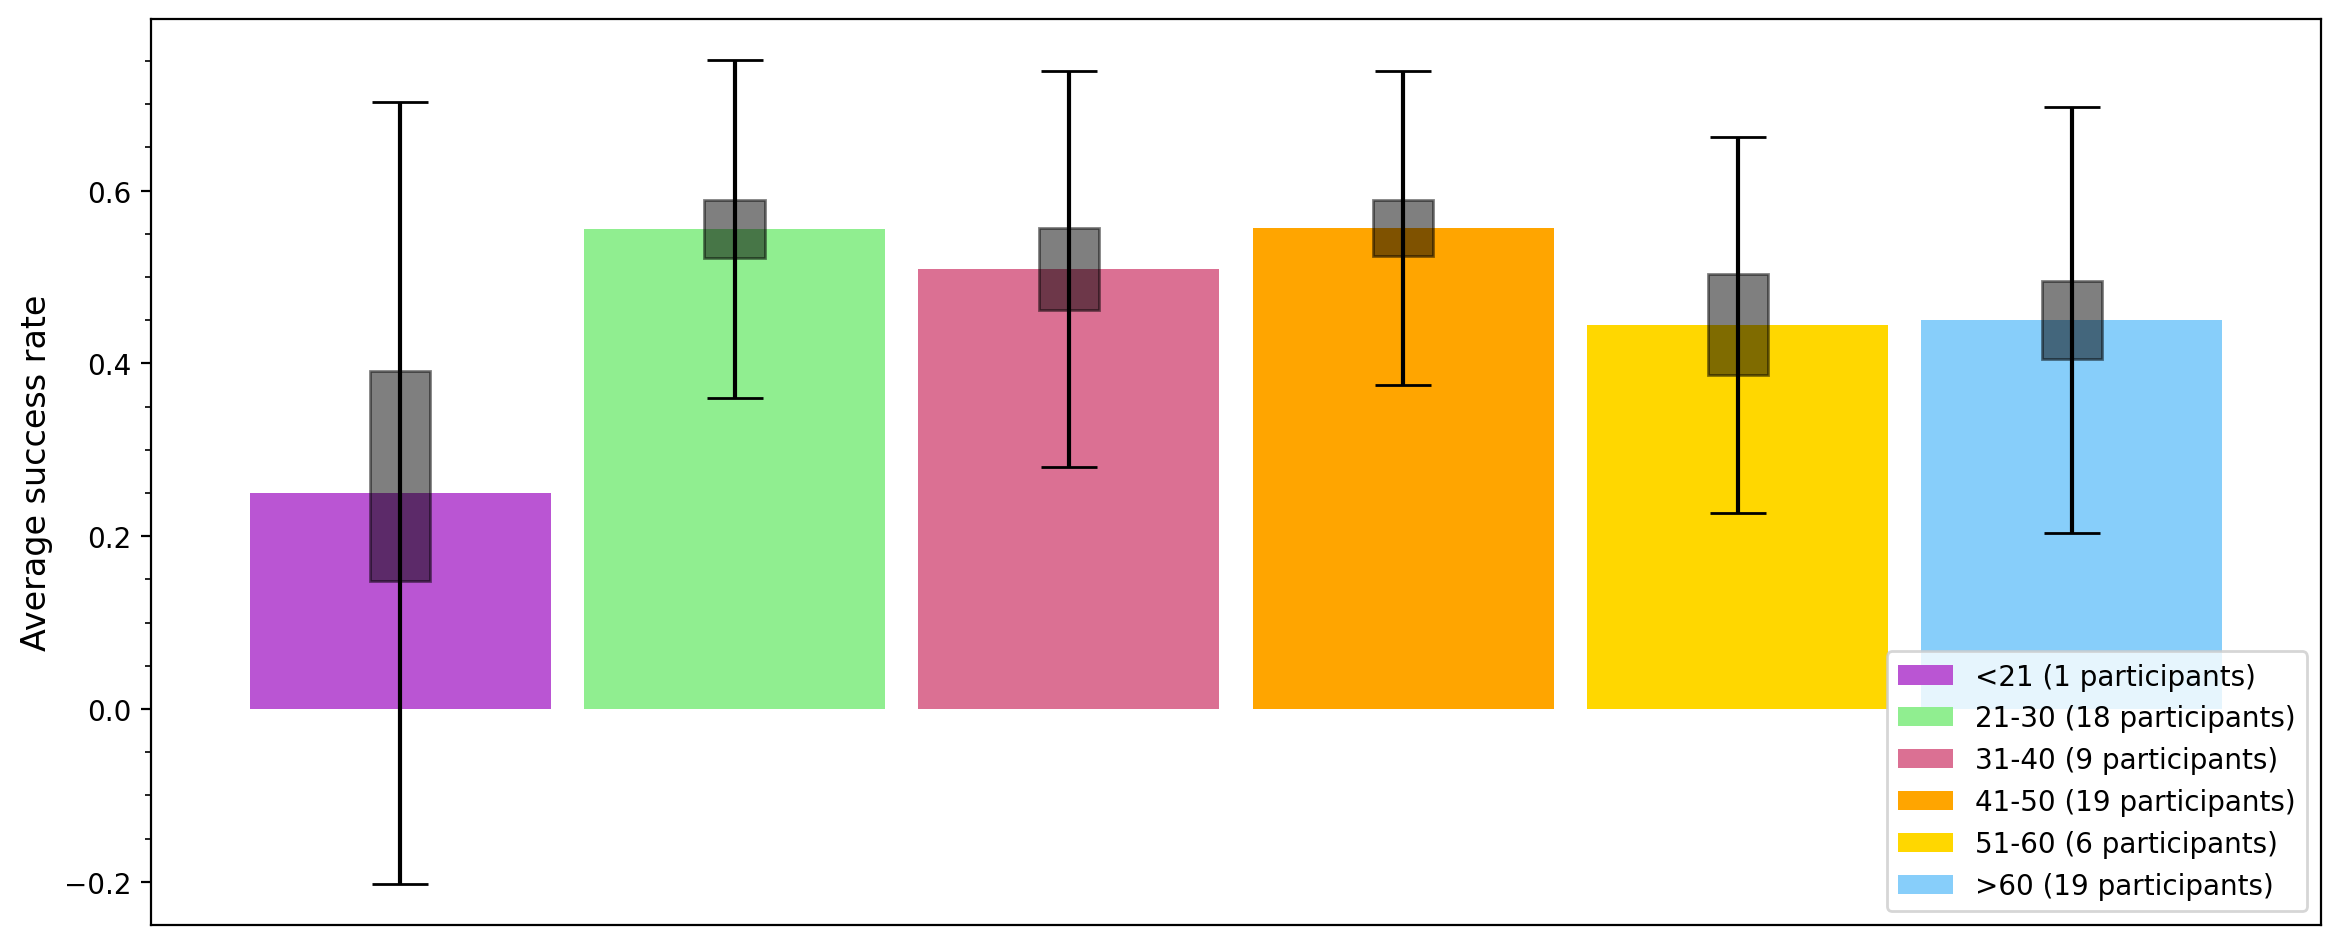

In [93]:
fig, ax = plt.subplots(figsize=(14,6),dpi=200)
x = np.arange(len(labels))
bar_width = .9
rects1 = ax.bar(1 - bar_width/2, means[1] , bar_width, yerr=data['std'][1], 
                label=labels[1] + " (" + str(participants[1]) + " participants)",color='mediumorchid', align='center',ecolor='black',capsize=10)
rects2 = ax.bar(2 - bar_width/2, means[2] , bar_width, yerr=data['std'][2], 
                label=labels[2] + " (" + str(participants[2]) + " participants)", color='lightgreen', align='center',ecolor='black',capsize=10)
rects3 = ax.bar(3 - bar_width/2, means[3] , bar_width, yerr=data['std'][3], 
                label=labels[3] + " (" + str(participants[3]) + " participants)", color = 'palevioletred', align='center',ecolor='black',capsize=10)
rects4 = ax.bar(4 - bar_width/2, means[4] , bar_width, yerr=data['std'][4], 
                label=labels[4] + " (" + str(participants[4]) + " participants)", color = 'orange', align='center',ecolor='black',capsize=10)
rects5 = ax.bar(5 - bar_width/2, means[5] , bar_width, yerr=data['std'][5], 
                label=labels[5] + " (" + str(participants[5]) + " participants)", color = 'gold', align='center',ecolor='black',capsize=10)
rects6 = ax.bar(6 - bar_width/2, means[6] , bar_width, yerr=data['std'][6], 
                label=labels[6] + " (" + str(participants[4]) + " participants)", color = 'lightskyblue', align='center',ecolor='black',capsize=10)



ax.set_ylabel('Average success rate',size=12)
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.add_patch(Rectangle((0.46, data['Jeff_low'][1]), 
                       0.18, data['Jeff_high'][1]-data['Jeff_low'][1],
                       alpha=0.5,color='black'))
ax.add_patch(Rectangle((1.46, data['Jeff_low'][2]), 
                       0.18, data['Jeff_high'][2]-data['Jeff_low'][2],
                       alpha=0.5,color='black'))
ax.add_patch(Rectangle((2.46, data['Jeff_low'][3]), 
                       0.18, data['Jeff_high'][3]-data['Jeff_low'][3],
                       alpha=0.5,color='black'))
ax.add_patch(Rectangle((3.46, data['Jeff_low'][4]), 
                       0.18, data['Jeff_high'][4]-data['Jeff_low'][4],
                       alpha=0.5,color='black'))
ax.add_patch(Rectangle((4.46, data['Jeff_low'][5]), 
                       0.18, data['Jeff_high'][5]-data['Jeff_low'][5],
                       alpha=0.5,color='black'))
ax.add_patch(Rectangle((5.46, data['Jeff_low'][6]), 
                       0.18, data['Jeff_high'][6]-data['Jeff_low'][6],
                       alpha=0.5,color='black'))
ax.set_xticks([])
ax.set_xticklabels([])
ax.legend(fontsize=10,loc='lower right')
#plt.savefig('ViewCube_plot1.png')
plt.show()

## Combined questions

In [94]:
graph1 = [G21.describe(), G21_30.describe(), G31_40.describe(), G41_50.describe(), G51_60.describe(), G_60.describe()]
graph2 = [G21_combined.describe(), G21_30_combined.describe(), G31_40_combined.describe(), G41_50_combined.describe(), G51_60_combined.describe(), G_60_combined.describe()]

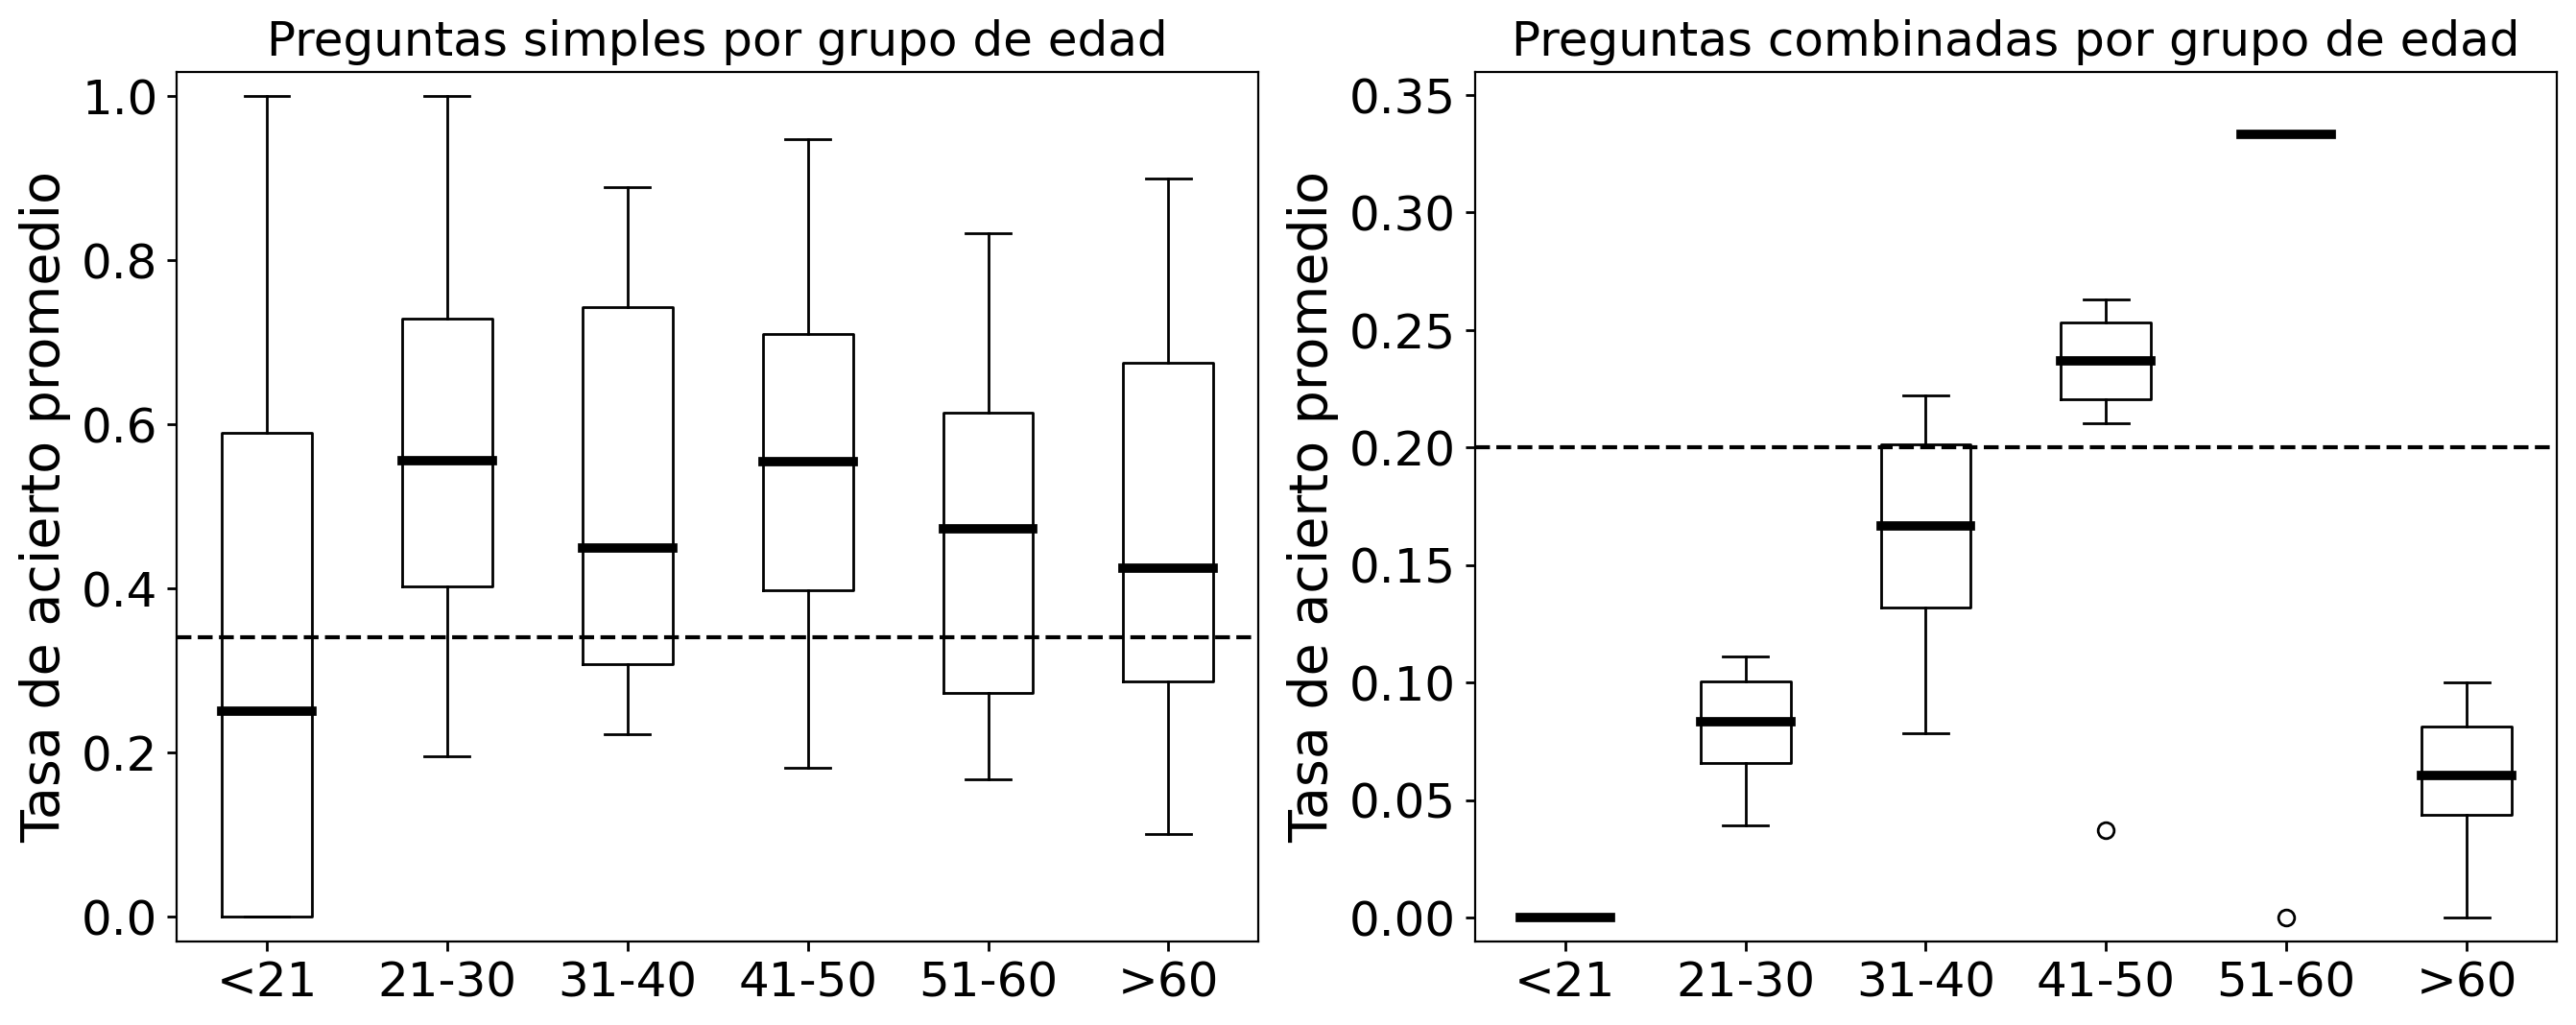

In [95]:
medianprops = dict(linestyle='-', linewidth=3.5, color='black')
labels_1 = ["<21", "21-30", "31-40", "41-50","51-60", ">60"]
fig, ax = plt.subplots(1, 2, figsize=(16,6), dpi=200)
ax[0].boxplot(graph1, '', medianprops=medianprops)
ax[0].set_xticklabels(labels_1, fontsize=20)
ax[0].tick_params(which='major', width=1.0, labelsize=18)
ax[0].set_title("Preguntas simples por grupo de edad", size=18)
ax[0].set_ylim(-0.03, 1.03)

ax[0].set_ylabel('Tasa de acierto promedio',size=20)

ax[1].boxplot(graph2, '', medianprops=medianprops)
ax[1].set_xticklabels(labels_1, fontsize=20)
ax[1].tick_params(which='major', width=1.0, labelsize=18)
ax[1].set_title("Preguntas combinadas por grupo de edad", size=18)
ax[1].set_ylim(-0.01, 0.36)
ax[1].set_ylabel('Tasa de acierto promedio',size=20)

ax[0].axhline(y=0.34, color='black', linestyle='--')
ax[1].axhline(y=0.2, color='black', linestyle='--')


plt.savefig('ViewCube_Ages-THESIS.png')

plt.show()

In [96]:
G21_correct

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0])

In [97]:
G21_combined_correct

array([0, 0])

In [98]:
G21 = np.concatenate((G21_correct, G21_combined_correct))
G21_30 = np.concatenate((G21_30_correct, G21_30_combined_correct))
G31_40 = np.concatenate((G31_40_correct, G31_40_combined_correct))
G41_50 = np.concatenate((G41_50_correct, G41_50_combined_correct))
G51_60 = np.concatenate((G51_60_correct, G51_60_combined_correct))
G60 = np.concatenate((G_60_correct, G_60_combined_correct))

# Normality - simple questions

In [99]:
from scipy.stats import shapiro

# Test normality for each group. p-value<0.05 =>not normally distributed
stat1, p0 = shapiro(G21)
stat2, p1 = shapiro(G21_30)
stat3, p2 = shapiro(G31_40)
stat4, p3 = shapiro(G41_50)
stat5, p4 = shapiro(G51_60)
stat6, p5 = shapiro(G_60)

print(f"G21 normality: p={p0}")
print(f"G21-30 normality: p={p1}")
print(f"G31-40 normality: p={p2}")
print(f"G41-50 normality: p={p3}")
print(f"G51-60 normality: p={p4}")
print(f"G60 normality: p={p5}")

G21 normality: p=7.890827873779926e-06
G21-30 normality: p=0.8666179776191711
G31-40 normality: p=0.09385979920625687
G41-50 normality: p=0.612010657787323
G51-60 normality: p=0.24090427160263062
G60 normality: p=0.6440741419792175


In [121]:
from scipy import stats as scistats
# Kruskal-Wallis test: kruskal_p_value < 0.05 => reject the null hypothesis => statistical significance
H_statistic, kruskal_p_value = scistats.kruskal(G21_correct, G21_30_correct, G31_40_correct, G41_50_correct, G51_60_correct, G_60_correct)
print(H_statistic, kruskal_p_value)

55.56478310039008 9.988704482364706e-11


In [101]:
import scikit_posthocs as sp
# Dunn test without Bonferroni correction (6 comparisons => alpha = 0.05/6 = 0.0083)
dunn_result = sp.posthoc_dunn([G21, G21_30, G31_40, G41_50, G51_60, G_60], p_adjust='bonferroni')

# Label the groups
dunn_result.index = ['G21', 'G21_30', 'G31_40', 'G41_50', 'G51_60', 'G_60']
dunn_result.columns = ['G21', 'G21_30', 'G31_40', 'G41_50', 'G51_60', 'G_60']

print(dunn_result)

                 G21        G21_30    G31_40        G41_50    G51_60      G_60
G21     1.000000e+00  6.350705e-08  0.000724  2.583481e-09  0.021776  1.000000
G21_30  6.350705e-08  1.000000e+00  1.000000  1.000000e+00  0.106978  0.000014
G31_40  7.242208e-04  1.000000e+00  1.000000  3.047382e-01  1.000000  0.023157
G41_50  2.583481e-09  1.000000e+00  0.304738  1.000000e+00  0.020608  0.000001
G51_60  2.177562e-02  1.069785e-01  1.000000  2.060779e-02  1.000000  0.304136
G_60    1.000000e+00  1.392360e-05  0.023157  1.023561e-06  0.304136  1.000000


In [102]:
# Alternative T-test
def t_test(counts, questions, null_value):  # Perform a one-sample t-test
    sample_mean = np.mean(counts)
    n = len(counts)
    sample_std = np.std(counts, ddof=1)  # Use sample standard deviation (ddof=1 for unbiased estimate)
    standard_error = sample_std / np.sqrt(n)
    test_statistic = (sample_mean - null_value) / standard_error
    degrees_freedom = n - 1
    p_value = scistats.t.sf(np.abs(test_statistic), df=degrees_freedom) * 2  # Two-tailed p-value
    if p_value <= 0.05:
        result = "Reject the null hypothesis. There is statistically significant evidence that the mean is different from the random choice value."
    else:
        result = "Fail to reject the null hypothesis. There is not enough statistically significant evidence that the mean is different from the random choice value."

    return test_statistic, p_value, degrees_freedom

In [103]:
questions = 12
null_value = 0.34

In [106]:
t_test(G21_correct, questions, null_value)

(-0.6893475175845635, 0.5048862286389315, 11)

In [107]:
t_test(G21_30_correct, questions, null_value)

(9.516880976948894, 1.209824768859406e-06, 11)

In [114]:
t_test(G21_30_combined_correct, 2, 0.2)

(2.6, 0.2337501225046868, 1)

In [108]:
t_test(G31_40_correct, questions, null_value)

(7.117550220178801, 1.9485047393498035e-05, 11)

In [115]:
t_test(G31_40_combined_correct, 2, 0.2)

(2.6, 0.2337501225046868, 1)

In [109]:
t_test(G41_50_correct, questions, null_value)

(10.285627727399929, 5.575627576957562e-07, 11)

In [116]:
t_test(G41_50_combined_correct, 2, 0.2)

(8.6, 0.07369460683487182, 1)

In [110]:
t_test(G51_60_correct, questions, null_value)

(6.18710871778687, 6.839192270991123e-05, 11)

In [120]:
G51_60_combined_correct

array([2, 2])

In [117]:
t_test(G51_60_combined_correct, 2, 0.2)

/var/folders/jw/nr9685ns4r32q0t030hxmzlw0000gn/T/ipykernel_16333/3552082184.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  test_statistic = (sample_mean - null_value) / standard_error


(inf, 0.0, 1)

In [111]:
t_test(G_60_correct, questions, null_value)

(5.839059421291509, 0.00011267256119333836, 11)

In [118]:
t_test(G_60_combined_correct, 2, 0.2)

(0.6, 0.6559582607547387, 1)